In [90]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr
from flexitext import flexitext
import matplotlib.pyplot as plt
import statsmodels.api as sm


- Maybe sub-group affect data does forecast, but not neuro data. 
- Add total to aggregate heatmap.


# Homemade functions

In [91]:
def get_trailer_peak(timecourse, max_min):

    # Get the maximum peak of the timecourse.
    if(max_min == 'max'):
        peak_id = np.argmax(timecourse)
    elif(max_min == 'min'):
        peak_id = np.argmin(timecourse)
    else: 
        print("Incorrect max_min value. Please use 'max' or 'min'.")

    # Check if the peak is the first or last timepoint.
    # For the peak, I am getting the average for all time points 
    # one TR before and after the peak.
    if(peak_id == 0):
        peak = np.mean(timecourse[peak_id:peak_id+1])
    elif(peak_id == len(timecourse)-1):
        peak = np.mean(timecourse[peak_id-1:peak_id])
    else:
        peak = np.mean(timecourse[peak_id-1:peak_id+1])
    
    return peak, peak_id

In [92]:

def plot_correlations_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Add annotations to the first plot. 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the second plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the third plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fourth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fifth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the sixth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)



In [93]:

def plot_correlations3_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Calculate coordinates for plotting. 
    NAcc_x_coord = np.mean(dataset_df[NAcc_label].max() + np.abs(dataset_df[NAcc_label].min())) * -0.15
    AIns_x_coord = np.mean(dataset_df[AIns_label].max() + np.abs(dataset_df[AIns_label].min())) * -0.15
    MPFC_x_coord = np.mean(dataset_df[MPFC_label].max() + np.abs(dataset_df[MPFC_label].min())) * -0.15

    PA_y_coord = (dataset_df["Pos_arousal_scaled"].max() - dataset_df["Pos_arousal_scaled"].min()) * -0.35 
    NA_y_coord = (dataset_df["Neg_arousal_scaled"].max() - dataset_df["Neg_arousal_scaled"].min()) * -0.4 
    W_y_coord = (dataset_df["W_score_scaled"].max() - dataset_df["W_score_scaled"].min()) * -0.45

    # Add annotations to the first plot (NAcc-Pos_arousal_scaled). 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=PA_y_coord-0.1, fontsize=12,  weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylabel('Positive arousal', fontsize = 12, weight='bold')

    # Add annotations to the second plot (NAcc-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylabel('Negative arousal', fontsize = 12, weight='bold')

    # Add annotations to the third plot (NAcc-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[2][0], 4)) + "; p-value: " + str(round(comedy_corr[2][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[2][0], 4)) + "; p-value: " + str(round(horror_corr[2][1], 5))
    whole_both_trailers_plot.axes[2, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].set_xlabel('NAcc ' + type, fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].set_ylabel('Watch scores', fontsize = 12, weight='bold')

    # Add annotations to the fourth plot (AIns-Pos_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=AIns_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=PA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the fifth plot (AIns-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=AIns_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the sixth plot (AIns-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[5][0], 4)) + "; p-value: " + str(round(comedy_corr[5][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[5][0], 4)) + "; p-value: " + str(round(horror_corr[5][1], 5))
    whole_both_trailers_plot.axes[2, 1].text(s=horror_cor_string, x=AIns_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 1].set_xlabel('AIns ' + type, fontsize = 12, weight='bold')

    # Add annotations to the seventh plot (MPFC-Pos_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=PA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the eighth plot (MPFC-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the ninth plot (MPFC-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[8][0], 4)) + "; p-value: " + str(round(comedy_corr[8][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[8][0], 4)) + "; p-value: " + str(round(horror_corr[8][1], 5))
    whole_both_trailers_plot.axes[2, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 2].set_xlabel('MPFC ' + type, fontsize = 12, weight='bold')


    # Path to save the plot.
    save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/IndividualChoice/Correlations_" + type 
    whole_both_trailers_plot.savefig(save_path + ".png", dpi=300, bbox_inches="tight")



In [94]:
# Fuction to create scatter plots with corr.
def plot_correlations(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.regplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green")
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [95]:
# Fuction to create scatter plots with corr.
def plot_correlations_2trailers(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.relplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", hue="Type", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [96]:
def compute_and_plot_corrs(dataframe, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    #Compute PA correlations
    NAcc_PA_corr = pearsonr(dataframe[NAcc_key], dataframe[PA_key])
    AIns_PA_corr = pearsonr(dataframe[AIns_key], dataframe[PA_key])
    MPFC_PA_corr = pearsonr(dataframe[MPFC_key], dataframe[PA_key])

    #Compute NA correlations
    NAcc_NA_corr = pearsonr(dataframe[NAcc_key], dataframe[NA_key])
    AIns_NA_corr = pearsonr(dataframe[AIns_key], dataframe[NA_key])
    MPFC_NA_corr = pearsonr(dataframe[MPFC_key], dataframe[NA_key])

    #Compute W correlations
    NAcc_W_corr = pearsonr(dataframe[NAcc_key], dataframe[W_key])
    AIns_W_corr = pearsonr(dataframe[AIns_key], dataframe[W_key])
    MPFC_W_corr = pearsonr(dataframe[MPFC_key], dataframe[W_key])

    #Create a list with all the correlations
    corrs = [NAcc_PA_corr, NAcc_NA_corr, NAcc_W_corr, AIns_PA_corr, AIns_NA_corr, AIns_W_corr, MPFC_PA_corr, MPFC_NA_corr, MPFC_W_corr]

    # Print the correlations results.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal is: " + str(round(NAcc_PA_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal is: " + str(round(AIns_PA_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal is: " + str(round(MPFC_PA_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal is: " + str(round(NAcc_NA_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal is: " + str(round(AIns_NA_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal is: " + str(round(MPFC_NA_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores is: " + str(round(NAcc_W_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores is: " + str(round(AIns_W_corr[0], 5)) + " with a p-value of: " + str((AIns_W_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores is: " + str(round(MPFC_W_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_corr[1])))

    plot_correlations(dataframe, corrs, signal, title)

In [97]:
def compute_and_plot_both_corrs(dataframe_main, dataframe_C, dataframe_H, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    # Compute PA correlations for Comedy trailers.
    NAcc_PA_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[PA_key])
    AIns_PA_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[PA_key])
    MPFC_PA_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[PA_key])

    # Compute PA correlations for Horror trailers.
    NAcc_PA_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[PA_key])
    AIns_PA_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[PA_key])
    MPFC_PA_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[PA_key])

    # Compute NA correlations for Comedy trailers.
    NAcc_NA_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[NA_key])
    AIns_NA_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[NA_key])
    MPFC_NA_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[NA_key])

    # Compute NA correlations for Horror trailers.
    NAcc_NA_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[NA_key])
    AIns_NA_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[NA_key])
    MPFC_NA_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[NA_key])

    # Compute W correlations for Comedy trailers.
    NAcc_W_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[W_key])
    AIns_W_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[W_key])
    MPFC_W_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[W_key])

    # Compute W correlations for Horror trailers.
    NAcc_W_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[W_key])
    AIns_W_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[W_key])
    MPFC_W_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[W_key])

    # Create a list with all the correlations for Comedy trailers.
    corrs_comedy = [NAcc_PA_comedy_corr, NAcc_NA_comedy_corr, NAcc_W_comedy_corr, AIns_PA_comedy_corr, AIns_NA_comedy_corr, AIns_W_comedy_corr, MPFC_PA_comedy_corr, MPFC_NA_comedy_corr, MPFC_W_comedy_corr]

    # Create a list with all the correlations for Horror trailers.
    corrs_horror = [NAcc_PA_horror_corr, NAcc_NA_horror_corr, NAcc_W_horror_corr, AIns_PA_horror_corr, AIns_NA_horror_corr, AIns_W_horror_corr, MPFC_PA_horror_corr, MPFC_NA_horror_corr, MPFC_W_horror_corr]
    
    # Print the correlations results for Comedy trailers.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal for Comedy trailers is: " + str(round(NAcc_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal for Comedy trailers is: " + str(round(AIns_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal for Comedy trailers is: " + str(round(MPFC_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal for Comedy trailers is: " + str(round(NAcc_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal for Comedy trailers is: " + str(round(AIns_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal for Comedy trailers is: " + str(round(MPFC_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores for Comedy trailers is: " + str(round(NAcc_W_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores for Comedy trailers is: " + str(round(AIns_W_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_W_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores for Comedy trailers is: " + str(round(MPFC_W_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_comedy_corr[1])))

    # Print the correlations results for Horror trailers.
    print("\n\nThe correlation between " + str(NAcc_key) + " activation and positive arousal for Horror trailers is: " + str(round(NAcc_PA_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal for Horror trailers is: " + str(round(AIns_PA_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal for Horror trailers is: " + str(round(MPFC_PA_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal for Horror trailers is: " + str(round(NAcc_NA_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal for Horror trailers is: " + str(round(AIns_NA_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal for Horror trailers is: " + str(round(MPFC_NA_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores for Horror trailers is: " + str(round(NAcc_W_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores for Horror trailers is: " + str(round(AIns_W_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_W_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores for Horror trailers is: " + str(round(MPFC_W_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_horror_corr[1])))

    # Plot the correlations for both types of trailers.
    plot_correlations3_bothTrailers(dataframe_main, signal, corrs_comedy, corrs_horror, title)

In [98]:
def process_clean_df(path, filter_threshold):

    # Load dataset. 
    all_subs_events_df = pd.read_csv(path)

    # Create dataframe to store cooks scores. 
    all_cooks_df = pd.DataFrame()
    participants_list = all_subs_events_df['Participant'].unique()

    for sub_id in participants_list: 

        # Get dataframe of current subject.
        current_sub_df = all_subs_events_df[all_subs_events_df['Participant'] == sub_id]
        current_sub_cooks_df = pd.DataFrame()

        # Define response variable.
        Y = current_sub_df['W_score_scaled']

        # Define explanatory variables for each model.
        X_affect = current_sub_df[['Pos_arousal_scaled', 'Neg_arousal_scaled']]
        X_whole = current_sub_df[['NAcc_whole', 'AIns_whole', 'MPFC_whole']]
        X_onset = current_sub_df[['NAcc_onset', 'AIns_onset', 'MPFC_onset']]
        X_middle = current_sub_df[['NAcc_middle', 'AIns_middle', 'MPFC_middle']]
        X_offset = current_sub_df[['NAcc_offset', 'AIns_offset', 'MPFC_offset']]
        X_ind_peaks_pos = current_sub_df[['NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos']]
        X_ind_peaks_neg = current_sub_df[['NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg']]

        # Add constant to predictor variables.
        X_affect = sm.add_constant(X_affect)
        X_whole = sm.add_constant(X_whole)
        X_onset = sm.add_constant(X_onset)
        X_middle = sm.add_constant(X_middle)
        X_offset = sm.add_constant(X_offset)
        X_ind_peaks_pos = sm.add_constant(X_ind_peaks_pos)
        X_ind_peaks_neg = sm.add_constant(X_ind_peaks_neg)

        # Fit linear regression models
        model_affect = sm.OLS(Y.astype(float), X_affect.astype(float)).fit()
        model_whole = sm.OLS(Y.astype(float), X_whole.astype(float)).fit()
        model_onset = sm.OLS(Y.astype(float), X_onset.astype(float)).fit()
        model_middle = sm.OLS(Y.astype(float), X_middle.astype(float)).fit()
        model_offset = sm.OLS(Y.astype(float), X_offset.astype(float)).fit()
        model_ind_peaks_pos = sm.OLS(Y.astype(float), X_ind_peaks_pos.astype(float)).fit()
        model_ind_peaks_neg = sm.OLS(Y.astype(float), X_ind_peaks_neg.astype(float)).fit()

        # Create instance of influence for each model.
        influence_affect = model_affect.get_influence()
        influence_whole = model_whole.get_influence()
        influence_onset = model_onset.get_influence()
        influence_middle = model_middle.get_influence()
        influence_offset = model_offset.get_influence()
        influence_ind_peaks_pos = model_ind_peaks_pos.get_influence()
        influence_ind_peaks_neg = model_ind_peaks_neg.get_influence()

        # Obtain Cook's distance for each observation in each model.
        affect_cooks_scores = influence_affect.cooks_distance
        whole_cooks_scores = influence_whole.cooks_distance
        onset_cooks_scores = influence_onset.cooks_distance
        middle_cooks_scores = influence_middle.cooks_distance
        offset_cooks_scores = influence_offset.cooks_distance
        ind_peaks_pos_cooks_scores = influence_ind_peaks_pos.cooks_distance
        ind_peaks_neg_cooks_scores = influence_ind_peaks_neg.cooks_distance

        # Add Cook's distance to the dataframe.
        current_sub_cooks_df["Participant_cooks"] = current_sub_df["Participant"]
        current_sub_cooks_df["Affect_cooks"] = affect_cooks_scores[0]
        current_sub_cooks_df["Whole_cooks"] = whole_cooks_scores[0]
        current_sub_cooks_df["Onset_cooks"] = onset_cooks_scores[0]
        current_sub_cooks_df["Middle_cooks"] = middle_cooks_scores[0]
        current_sub_cooks_df["Offset_cooks"] = offset_cooks_scores[0]
        current_sub_cooks_df["Ind_peaks_pos_cooks"] = ind_peaks_pos_cooks_scores[0]
        current_sub_cooks_df["Ind_peaks_neg_cooks"] = ind_peaks_neg_cooks_scores[0]

        # Append the current subject's Cook's distance to the main dataframe.
        all_cooks_df = pd.concat([all_cooks_df, current_sub_cooks_df], ignore_index=True)

        del current_sub_cooks_df

    # Append cooks columns to main dataframe.
    all_subs_events_df = pd.concat([all_subs_events_df, all_cooks_df], axis=1)

    # Filter out the outliers.
    # Drop rows with Cook's distance higher than the threshold.
    all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < filter_threshold]
    all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < filter_threshold]
    #all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < filter_threshold]
    all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < filter_threshold]
    #all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < filter_threshold]
    #all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < filter_threshold]
    #all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < filter_threshold]
    all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < filter_threshold]

    return all_subs_events_df       

# Clean data

In [99]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/GitHub


In [100]:
# Open csv file. 
all_subs_events_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation.csv') #AllSubs_NeuralActivation_main
all_subs_ISC_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralISC.csv')

# Drop the first columns of the dataframe (repeated). 
ISC_cols = ['NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', "NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC",
           "NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC", "NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC",
           "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC", 'NAcc_MPFC', 'AIns_MPFC', 'NAcc_AIns', 'NAcc_MPFC_ISFC', 
           'AIns_MPFC_ISFC', 'NAcc_AIns_ISFC', 'AIns_NAcc_ISFC', 'MPFC_NAcc_ISFC', 'MPFC_AIns_ISFC']
all_subs_ISC_df = all_subs_ISC_df[ISC_cols] 

all_subs_events_df = pd.concat([all_subs_events_df, all_subs_ISC_df], axis=1)

print("The un-cleaned shape of the dataframe is: ", all_subs_events_df.shape)
all_subs_events_df.head()


The un-cleaned shape of the dataframe is:  (943, 271)


Participant Trailer    Type  Onset  Offset  Duration  W_score  A_score  \
0      sub-01     rh6  Horror   12.0    42.0        30        3        3   
1      sub-01     uh1  Horror   60.0    90.0        30        1        3   
2      sub-01     rc2  Comedy  108.0   138.0        30        1        1   
3      sub-01     rh2  Horror  152.0   182.0        30        3        2   
4      sub-01     rh1  Horror  196.0   226.0        30        4        3   

   F_score  NAcc_onset  ...  MPFC_DC_ISC  NAcc_MPFC  AIns_MPFC  NAcc_AIns  \
0        2    0.063491  ...    -0.300701  -0.419513   0.421823   0.180297   
1        3    0.118238  ...    -0.380949   0.052667   0.546334   0.165897   
2        3   -0.121954  ...     0.046403  -0.255859  -0.353887   0.447565   
3        2   -0.155881  ...     0.075007  -0.171850   0.160705   0.526802   
4        2    0.138968  ...     0.340545  -0.439945   0.391110   0.200326   

   NAcc_MPFC_ISFC  AIns_MPFC_ISFC  NAcc_AIns_ISFC  AIns_NAcc_ISFC  \
0        0.524188        0.285226        0.260213        0.152045   
1       -0.106814       -0.044017        0.174884        0.158577   
2       -0.299302        0.014712        0.105032        0.339968   
3       -0.312321       -0.065875       -0.154832       -0.106816   
4        0.303817        0.795204       -0.311960        0.101055   

   MPFC_NAcc_ISFC  MPFC_AIns_ISFC  
0       -0.253519       -0.270446  
1       -0.284157        1.038369  
2       -0.254336       -0.438786  
3       -0.165307       -0.075435  
4       -0.008022        0.371668  

[5 rows x 271 columns]

In [101]:
# Getting Horror and Comedy Like-Dislike subgroups.

# Sepatare the dataframe into Horror and Comedy trials.
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)

# Get the mean and std of the W_score_scaled for each participant.
Individuals_mean_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False).mean()
Individuals_std_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False).std()
Individuals_mean_comedy_df["W_score_scaled_std"] = Individuals_std_comedy_df["W_score_scaled"]
Individuals_mean_comedy_df["Type"] = "Comedy"

Individuals_mean_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False).mean()
Individuals_std_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False).std()
Individuals_mean_horror_df["W_score_scaled_std"] = Individuals_std_horror_df["W_score_scaled"]
Individuals_mean_horror_df["Type"] = "Horror"

# Get threshold for participants to exclude because the just don't like horror movies. 
Horror_w_threshold = Individuals_mean_horror_df["W_score_scaled"].describe()["50%"]
Comedy_w_threshold = Individuals_mean_comedy_df["W_score_scaled"].describe()["50%"]

# Get the list of participants who like and dislike horror and comedy movies.
Dislike_horror_list = []
Like_horror_list = []

Dislike_comedy_list = []
Like_comedy_list = []

participants_list = all_subs_events_df['Participant'].unique()

for participant_id in range(len(participants_list)):

    if Individuals_mean_horror_df.loc[participant_id, "W_score_scaled"] < Horror_w_threshold: #0:
        Dislike_horror_list.append(participants_list[participant_id])
    else: 
        Like_horror_list.append(participants_list[participant_id])

    if Individuals_mean_comedy_df.loc[participant_id, "W_score_scaled"] < Comedy_w_threshold: #0:
        Dislike_comedy_list.append(participants_list[participant_id])
    else:
        Like_comedy_list.append(participants_list[participant_id])

print("Participants who dislike horror movies: ", Dislike_horror_list)
print("Participants who like horror movies: ", Like_horror_list)

print("\nParticipants who dislike comedy movies: ", Dislike_comedy_list)
print("Participants who like comedy movies: ", Like_comedy_list)

# Add the preference column to the dataframes.
all_subs_events_df["H_preference"] = "Like"
all_subs_events_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"


Participants who dislike horror movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-09', 'sub-18', 'sub-21', 'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']
Participants who like horror movies:  ['sub-01', 'sub-08', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']

Participants who dislike comedy movies:  ['sub-01', 'sub-08', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-27', 'sub-29', 'sub-31', 'sub-32', 'sub-34']
Participants who like comedy movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-09', 'sub-10', 'sub-18', 'sub-21', 'sub-25', 'sub-26', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']


In [102]:
# Calculate Cook's distance for each observation.

all_cooks_df = pd.DataFrame()
participants_list = all_subs_events_df['Participant'].unique()

for sub_id in participants_list: 

    print("Calculating cooks distance for subject: ", sub_id)

    # Get dataframe of current subject.
    current_sub_df = all_subs_events_df[all_subs_events_df['Participant'] == sub_id]
    current_sub_cooks_df = pd.DataFrame()

    # Define response variable.
    Y = current_sub_df['W_score_scaled']

    # Define explanatory variables for each model.
    X_affect = current_sub_df[['Pos_arousal_scaled', 'Neg_arousal_scaled']]
    X_whole = current_sub_df[['NAcc_whole', 'AIns_whole', 'MPFC_whole']]
    X_onset = current_sub_df[['NAcc_onset', 'AIns_onset', 'MPFC_onset']]
    X_middle = current_sub_df[['NAcc_middle', 'AIns_middle', 'MPFC_middle']]
    X_offset = current_sub_df[['NAcc_offset', 'AIns_offset', 'MPFC_offset']]
    X_ISC = current_sub_df[['NAcc_ISC', 'AIns_ISC', 'MPFC_ISC']]
    X_ind_peaks_pos = current_sub_df[['NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos']]
    #X_ind_peaks_neg = current_sub_df[['NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg']]
    X_dem_peaks_pos = current_sub_df[['NAcc_dem_peak_pos', 'AIns_dem_peak_pos', 'MPFC_dem_peak_pos']]
    X_dem_peaks_pos_yes = current_sub_df[["NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes"]]
    #X_dem_peaks_neg = current_sub_df[['NAcc_dem_peak_neg', 'AIns_dem_peak_neg', 'MPFC_dem_peak_neg']]
    X_avg_peaks_pos = current_sub_df[["NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos"]]
    X_avg_peaks_pos_yes = current_sub_df[["NAcc_avg_peak_yes_pos", "AIns_avg_peak_yes_pos", "MPFC_avg_peak_yes_pos"]]
    X_dem_peaks_pos2 = current_sub_df[['NAcc_dem_peak_pos', 'AIns_dem_peak_pos', 'MPFC_dem_peak_pos', 'AIns_dem_peak_pos6']]

    # Add constant to predictor variables.
    X_affect = sm.add_constant(X_affect)
    X_whole = sm.add_constant(X_whole)
    X_onset = sm.add_constant(X_onset)
    X_middle = sm.add_constant(X_middle)
    X_offset = sm.add_constant(X_offset)
    X_ISC = sm.add_constant(X_ISC)
    X_ind_peaks_pos = sm.add_constant(X_ind_peaks_pos)
    #X_ind_peaks_neg = sm.add_constant(X_ind_peaks_neg)
    X_dem_peaks_pos = sm.add_constant(X_dem_peaks_pos)
    X_dem_peaks_pos_yes = sm.add_constant(X_dem_peaks_pos_yes)
    #X_dem_peaks_neg = sm.add_constant(X_dem_peaks_neg)
    X_avg_peaks_pos = sm.add_constant(X_avg_peaks_pos)
    X_avg_peaks_pos_yes = sm.add_constant(X_avg_peaks_pos_yes)
    X_dem_peaks_pos2 = sm.add_constant(X_dem_peaks_pos2)

    # Fit linear regression models
    model_affect = sm.OLS(Y.astype(float), X_affect.astype(float)).fit()
    model_whole = sm.OLS(Y.astype(float), X_whole.astype(float)).fit()
    model_onset = sm.OLS(Y.astype(float), X_onset.astype(float)).fit()
    model_middle = sm.OLS(Y.astype(float), X_middle.astype(float)).fit()
    model_offset = sm.OLS(Y.astype(float), X_offset.astype(float)).fit()
    model_ISC = sm.OLS(Y.astype(float), X_ISC.astype(float)).fit()
    model_ind_peaks_pos = sm.OLS(Y.astype(float), X_ind_peaks_pos.astype(float)).fit()
    #model_ind_peaks_neg = sm.OLS(Y.astype(float), X_ind_peaks_neg.astype(float)).fit()
    model_dem_peaks_pos = sm.OLS(Y.astype(float), X_dem_peaks_pos.astype(float)).fit()
    model_dem_peaks_pos_yes = sm.OLS(Y.astype(float), X_dem_peaks_pos_yes.astype(float)).fit()
    #model_dem_peaks_neg = sm.OLS(Y.astype(float), X_dem_peaks_neg.astype(float)).fit()
    model_avg_peaks_pos = sm.OLS(Y.astype(float), X_avg_peaks_pos.astype(float)).fit()
    model_avg_peaks_pos_yes = sm.OLS(Y.astype(float), X_avg_peaks_pos_yes.astype(float)).fit()
    model_dem_peaks_pos2 = sm.OLS(Y.astype(float), X_dem_peaks_pos2.astype(float)).fit()

    # Create instance of influence for each model.
    influence_affect = model_affect.get_influence()
    influence_whole = model_whole.get_influence()
    influence_onset = model_onset.get_influence()
    influence_middle = model_middle.get_influence()
    influence_offset = model_offset.get_influence()
    influence_ISC = model_ISC.get_influence()
    influence_ind_peaks_pos = model_ind_peaks_pos.get_influence()
    #influence_ind_peaks_neg = model_ind_peaks_neg.get_influence()
    influence_dem_peaks_pos = model_dem_peaks_pos.get_influence()
    influence_dem_peaks_pos_yes = model_dem_peaks_pos_yes.get_influence()
    #influence_dem_peaks_neg = model_dem_peaks_neg.get_influence()
    influence_avg_peaks_pos = model_avg_peaks_pos.get_influence()
    influence_avg_peaks_pos_yes = model_avg_peaks_pos_yes.get_influence()
    influence_dem_peaks_pos2 = model_dem_peaks_pos2.get_influence()

    # Obtain Cook's distance for each observation in each model.
    affect_cooks_scores = influence_affect.cooks_distance
    whole_cooks_scores = influence_whole.cooks_distance
    onset_cooks_scores = influence_onset.cooks_distance
    middle_cooks_scores = influence_middle.cooks_distance
    offset_cooks_scores = influence_offset.cooks_distance
    ISC_cooks_scores = influence_ISC.cooks_distance
    ind_peaks_pos_cooks_scores = influence_ind_peaks_pos.cooks_distance
    #ind_peaks_neg_cooks_scores = influence_ind_peaks_neg.cooks_distance
    dem_peaks_pos_cooks_scores = influence_dem_peaks_pos.cooks_distance
    dem_peaks_pos_yes_cooks_scores = influence_dem_peaks_pos_yes.cooks_distance
    #dem_peaks_neg_cooks_scores = influence_dem_peaks_neg.cooks_distance
    avg_peaks_pos_cooks_scores = influence_avg_peaks_pos.cooks_distance
    avg_peaks_pos_yes_cooks_scores = influence_avg_peaks_pos_yes.cooks_distance
    dem_peaks_pos_cooks_scores2 = influence_dem_peaks_pos2.cooks_distance

    # Add Cook's distance to the dataframe.
    current_sub_cooks_df["Participant_cooks"] = current_sub_df["Participant"]
    current_sub_cooks_df["Affect_cooks"] = affect_cooks_scores[0]
    current_sub_cooks_df["Whole_cooks"] = whole_cooks_scores[0]
    current_sub_cooks_df["Onset_cooks"] = onset_cooks_scores[0]
    current_sub_cooks_df["Middle_cooks"] = middle_cooks_scores[0]
    current_sub_cooks_df["Offset_cooks"] = offset_cooks_scores[0]
    current_sub_cooks_df["ISC_cooks"] = ISC_cooks_scores[0]
    current_sub_cooks_df["Ind_peaks_pos_cooks"] = ind_peaks_pos_cooks_scores[0]
    #current_sub_cooks_df["Ind_peaks_neg_cooks"] = ind_peaks_neg_cooks_scores[0]
    current_sub_cooks_df["Dem_peaks_pos_cooks"] = dem_peaks_pos_cooks_scores[0]
    current_sub_cooks_df["Dem_peaks_pos_yes_cooks"] = dem_peaks_pos_yes_cooks_scores[0]
    #current_sub_cooks_df["Dem_peaks_neg_cooks"] = dem_peaks_neg_cooks_scores[0]
    current_sub_cooks_df["Avg_peaks_pos_cooks"] = avg_peaks_pos_cooks_scores[0]
    current_sub_cooks_df["Avg_peaks_pos_yes_cooks"] = avg_peaks_pos_yes_cooks_scores[0]
    current_sub_cooks_df["Dem_peaks_pos_cooks2"] = dem_peaks_pos_cooks_scores2[0]

    # Append the current subject's Cook's distance to the main dataframe.
    all_cooks_df = pd.concat([all_cooks_df, current_sub_cooks_df], ignore_index=True)

    del current_sub_cooks_df

print("The shape of the Cook's distance dataframe is: ", all_cooks_df.shape)

Calculating cooks distance for subject:  sub-01
Calculating cooks distance for subject:  sub-02
Calculating cooks distance for subject:  sub-03
Calculating cooks distance for subject:  sub-04
Calculating cooks distance for subject:  sub-08
Calculating cooks distance for subject:  sub-09
Calculating cooks distance for subject:  sub-10
Calculating cooks distance for subject:  sub-11
Calculating cooks distance for subject:  sub-12
Calculating cooks distance for subject:  sub-13
Calculating cooks distance for subject:  sub-15
Calculating cooks distance for subject:  sub-17
Calculating cooks distance for subject:  sub-18
Calculating cooks distance for subject:  sub-19
Calculating cooks distance for subject:  sub-21
Calculating cooks distance for subject:  sub-22
Calculating cooks distance for subject:  sub-23
Calculating cooks distance for subject:  sub-25
Calculating cooks distance for subject:  sub-26
Calculating cooks distance for subject:  sub-27
Calculating cooks distance for subject: 

In [103]:
# Add Cook's distance to the main dataframe.
all_subs_events_df = pd.concat([all_subs_events_df, all_cooks_df], axis=1)
all_subs_events_df

Participant Trailer    Type  Onset  Offset  Duration  W_score  A_score  \
0        sub-01     rh6  Horror   12.0    42.0        30        3        3   
1        sub-01     uh1  Horror   60.0    90.0        30        1        3   
2        sub-01     rc2  Comedy  108.0   138.0        30        1        1   
3        sub-01     rh2  Horror  152.0   182.0        30        3        2   
4        sub-01     rh1  Horror  196.0   226.0        30        4        3   
..          ...     ...     ...    ...     ...       ...      ...      ...   
938      sub-37     rh8  Horror  520.0   550.0        30        1        2   
939      sub-37    rc10  Comedy  568.0   598.0        30        3        3   
940      sub-37     uh3  Horror  616.0   646.0        30        1        1   
941      sub-37     rc7  Comedy  660.0   690.0        30        2        2   
942      sub-37     uh4  Horror  704.0   734.0        30        1        1   

     F_score  NAcc_onset  ...  Onset_cooks  Middle_cooks  Offset_cooks  \
0          2    0.063491  ...     0.004442      0.034863      0.002824   
1          3    0.118238  ...     0.042823      0.016861      0.049089   
2          3   -0.121954  ...     0.036839      0.022144      0.026630   
3          2   -0.155881  ...     0.017999      0.010483      0.003732   
4          2    0.138968  ...     0.079734      0.023775      0.063117   
..       ...         ...  ...          ...           ...           ...   
938        1    0.078175  ...     0.022347      0.063600      0.031783   
939        3   -0.083276  ...     0.002955      0.005386      0.003412   
940        1   -0.159902  ...     0.110399      0.050596      0.024788   
941        3    0.002952  ...     0.007529      0.031437      0.003775   
942        2    0.065701  ...     0.028758      0.025221      0.069692   

     ISC_cooks  Ind_peaks_pos_cooks  Dem_peaks_pos_cooks  \
0     0.150176             0.005681             0.016242   
1     0.024583             0.031842             0.018190   
2     0.039839             0.070036             0.021093   
3     0.003918             0.007037             0.016755   
4     0.034554             0.094566             0.165919   
..         ...                  ...                  ...   
938   0.024262             0.058750             0.016014   
939   0.103009             0.002532             0.009779   
940   0.038262             0.015843             0.123608   
941   0.010586             0.014595             0.003946   
942   0.067178             0.047667             0.019352   

     Dem_peaks_pos_yes_cooks  Avg_peaks_pos_cooks  Avg_peaks_pos_yes_cooks  \
0                   0.000004             0.078258                 0.006826   
1                   0.077519             0.021181                 0.035056   
2                   0.010943             0.022900                 0.012091   
3                   0.015607             0.006467                 0.080451   
4                   0.244785             0.092779                 0.048374   
..                       ...                  ...                      ...   
938                 0.146902             0.053449                 0.039971   
939                 0.004541             0.006758                 0.005195   
940                 0.053281             0.041139                 0.059871   
941                 0.001740             0.002775                 0.023328   
942                 0.040005             0.021204                 0.036336   

     Dem_peaks_pos_cooks2  
0                0.008694  
1                0.016957  
2                0.022338  
3                0.016672  
4                0.119263  
..                    ...  
938              0.024180  
939              0.008304  
940              0.103514  
941              0.013349  
942              0.018433  

[943 rows x 286 columns]

In [104]:
# Visualize cooks distance for each model.

# fig, axs = plt.subplots(8, 1, figsize=(35, 40), sharex=False) 

# time_points = np.arange(all_subs_events_df.shape[0])

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Whole_cooks', ax=axs[0])
# axs[0].set_title("Whole TRs Cook's distance")
# axs[0].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Onset_cooks', ax=axs[1])
# axs[1].set_title("Onset TRs Cook's distance")
# axs[1].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Middle_cooks', ax=axs[2])
# axs[2].set_title("Middle TRs Cook's distance")
# axs[2].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Offset_cooks', ax=axs[3])
# axs[3].set_title("Offset TRs Cook's distance")
# axs[3].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='ISC_cooks', ax=axs[4])
# axs[4].set_title("ISC TRs Cook's distance")
# axs[4].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Dem_peaks_pos_cooks', ax=axs[5])
# axs[5].set_title("Dem_peaks_pos TRs Cook's distance")
# axs[5].set_xlabel("Time points")

# # sns.lineplot(data=all_subs_events_df, x=time_points, y='Dem_peaks_neg_cooks', ax=axs[6])
# # axs[6].set_title("Dem_peaks_neg TRs Cook's distance")
# # axs[6].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Affect_cooks', ax=axs[7])
# axs[7].set_title("Affect TRs Cook's distance")
# axs[7].set_xlabel("Time points")



In [105]:
print(all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] > 1].shape)
print("The maximum Cook's distance for the whole model is: ", all_subs_events_df['Whole_cooks'].max())
print("The maximum Cook's distance for the onset model is: ", all_subs_events_df['Onset_cooks'].max())
print("The maximum Cook's distance for the middle model is: ", all_subs_events_df['Middle_cooks'].max())
print("The maximum Cook's distance for the offset model is: ", all_subs_events_df['Offset_cooks'].max())
print("The maximum Cook's distance for the ISC model is: ", all_subs_events_df['ISC_cooks'].max())
print("The maximum Cook's distance for the ind_peaks_pos model is: ", all_subs_events_df['Ind_peaks_pos_cooks'].max())
#print("The maximum Cook's distance for the ind_peaks_neg model is: ", all_subs_events_df['Ind_peaks_neg_cooks'].max())
print("The maximum Cook's distance for the affect model is: ", all_subs_events_df['Affect_cooks'].max())
print("The maximum Cook's distance for the dem_peaks_pos model is: ", all_subs_events_df['Dem_peaks_pos_cooks'].max())
#print("The maximum Cook's distance for the dem_peaks_neg model is: ", all_subs_events_df['Dem_peaks_neg_cooks'].max())
print("The maximum Cook's distance for the avg_peaks_pos model is: ", all_subs_events_df['Avg_peaks_pos_cooks'].max())
print("The maximum Cook's distance for the avg_peaks_pos_yes model is: ", all_subs_events_df['Avg_peaks_pos_yes_cooks'].max())





(1, 286)
The maximum Cook's distance for the whole model is:  0.71397431998954
The maximum Cook's distance for the onset model is:  0.7794892772010802
The maximum Cook's distance for the middle model is:  0.8239217078034191
The maximum Cook's distance for the offset model is:  1.1529378435230007
The maximum Cook's distance for the ISC model is:  1.351390127444766
The maximum Cook's distance for the ind_peaks_pos model is:  1.0396324826191097
The maximum Cook's distance for the affect model is:  0.8506325536759258
The maximum Cook's distance for the dem_peaks_pos model is:  0.7514680084911446
The maximum Cook's distance for the avg_peaks_pos model is:  0.8938050432799437
The maximum Cook's distance for the avg_peaks_pos_yes model is:  0.5250562079320863


In [106]:
""" 
#Preliminary results filtering: 

drop_threshold = .15

# Drop rows with Cook's distance higher than the threshold.
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] #0.1 -> good for aggregate.
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold] 
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_yes_cooks'] < drop_threshold] # 0.1 -> Best for individual choice.
"""




" \n#Preliminary results filtering: \n\ndrop_threshold = .15\n\n# Drop rows with Cook's distance higher than the threshold.\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] #0.1 -> good for aggregate.\nall_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold] \n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_

In [107]:

"""
drop_threshold = .15

# Drop rows with Cook's distance higher than the threshold.
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] 
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks2'] < drop_threshold] 
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_yes_cooks'] < drop_threshold] # 0.1 -> Best for individual choice.

print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)
"""




'\ndrop_threshold = .15\n\n# Drop rows with Cook\'s distance higher than the threshold.\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Whole_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Onset_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Middle_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Offset_cooks\'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'ISC_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_cooks\'] < drop_threshold] \nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_yes_cooks\'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_cooks2\'] < drop_threshold] \n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_neg_cooks\'] < drop_threshold]\n#all_subs_eve

In [108]:


# New filtering based on z-scores. 
# Any value that is equal or higher than 3 sd gets filtered.
drop_threshold1 = 3 #1.25 #2.5
drop_threshold2 = -3 #-1.25 #-2.5

all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_onset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_onset_z'] < drop_threshold2) | 
                                        (all_subs_events_df['AIns_onset_z'] < drop_threshold1) | (all_subs_events_df['AIns_onset_z'] < drop_threshold2) | 
                                        (all_subs_events_df['MPFC_onset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_onset_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_middle_z'] < drop_threshold1) | (all_subs_events_df['NAcc_middle_z'] < drop_threshold2) | 
                                        (all_subs_events_df['AIns_middle_z'] < drop_threshold1) | (all_subs_events_df['AIns_middle_z'] < drop_threshold2) | 
                                        (all_subs_events_df['MPFC_middle_z'] < drop_threshold1) | (all_subs_events_df['MPFC_middle_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_offset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_offset_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_offset_z'] < drop_threshold1) | (all_subs_events_df['AIns_offset_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_offset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_offset_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_whole_z'] < drop_threshold1) | (all_subs_events_df['NAcc_whole_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_whole_z'] < drop_threshold1) | (all_subs_events_df['AIns_whole_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_whole_z'] < drop_threshold1) | (all_subs_events_df['MPFC_whole_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold2)]

print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)




The shape of the dataframe after dropping rows is:  (943, 286)


In [109]:
# Separate files based on type of trailer. 
all_subs_events_df.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')

all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Horror.csv')

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Comedy.csv')


# Visualize data 

## Behavioral Associations. 

The correlation between W_score and Pos_arousal is: 0.5936 with a p-value of: 7.173175504814747e-91
The correlation between W_score and Neg_arousal is: -0.1647 with a p-value of: 3.656672641138031e-07


Text(-1, -2, 'r= -0.1647; p-value: 3.656672641138031e-07')

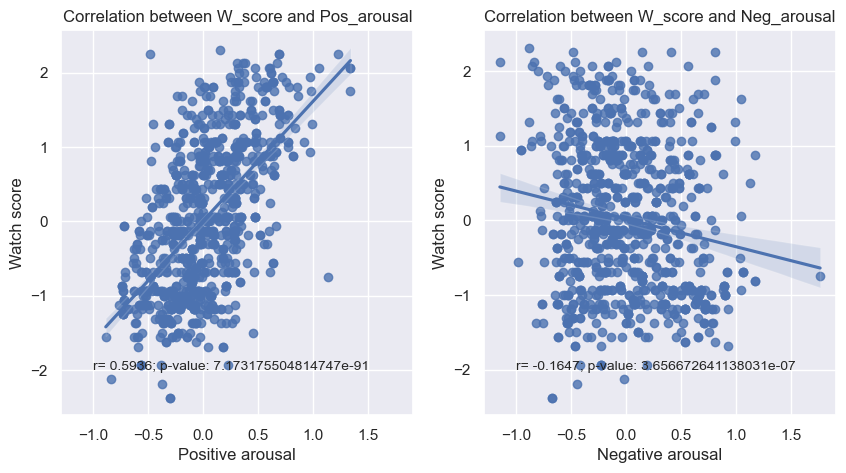

In [110]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for both types of trailers. 
W_PA_All_corr = pearsonr(all_subs_events_df["W_score_scaled"], all_subs_events_df["Pos_arousal_scaled"])
W_NA_All_corr = pearsonr(all_subs_events_df["W_score_scaled"], all_subs_events_df["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal is: " + str(round(W_PA_All_corr[0], 4)) + " with a p-value of: " + str((W_PA_All_corr[1])))
print("The correlation between W_score and Neg_arousal is: " + str(round(W_NA_All_corr[0], 4)) + " with a p-value of: " + str((W_NA_All_corr[1])))

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# Plot the correlation between W_score and Pos_arousal.
W_PA_plot = sns.regplot(data=all_subs_events_df, x="Pos_arousal_scaled", y="W_score_scaled", ax=axs[0])
W_PA_plot.set_title("Correlation between W_score and Pos_arousal")
W_PA_plot.set_xlabel("Positive arousal")
W_PA_plot.set_ylabel("Watch score")

# Plot the correlation between W_score and Neg_arousal.
W_NA_plot = sns.regplot(data=all_subs_events_df, x="Neg_arousal_scaled", y="W_score_scaled", ax=axs[1])
W_NA_plot.set_title("Correlation between W_score and Neg_arousal")
W_NA_plot.set_xlabel("Negative arousal")
W_NA_plot.set_ylabel("Watch score")

# Add annotation to the plot. 
W_PA_string = "r= " + str(round(W_PA_All_corr[0], 4)) + "; p-value: " + str((W_PA_All_corr[1]))
axs[0].text(s=W_PA_string, x=-1, y=-2, fontsize=10)
W_NA_string = "r= " + str(round(W_NA_All_corr[0], 4)) + "; p-value: " + str((W_NA_All_corr[1]))
axs[1].text(s=W_NA_string, x=-1, y=-2, fontsize=10)


In [111]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for comedy trailers.
W_PA_comedy_corr = pearsonr(all_subs_events_comedy["W_score_scaled"], all_subs_events_comedy["Pos_arousal_scaled"])
W_NA_comedy_corr = pearsonr(all_subs_events_comedy["W_score_scaled"], all_subs_events_comedy["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for comedy trailers is: " + str(round(W_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((W_PA_comedy_corr[1])))
print("The correlation between W_score and Neg_arousal for comedy trailers is: " + str(round(W_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((W_NA_comedy_corr[1])))

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for horror trailers.
W_PA_horror_corr = pearsonr(all_subs_events_horror["W_score_scaled"], all_subs_events_horror["Pos_arousal_scaled"])
W_NA_horror_corr = pearsonr(all_subs_events_horror["W_score_scaled"], all_subs_events_horror["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for horror trailers is: " + str(round(W_PA_horror_corr[0], 4)) + " with a p-value of: " + str((W_PA_horror_corr[1])))
print("The correlation between W_score and Neg_arousal for horror trailers is: " + str(round(W_NA_horror_corr[0], 4)) + " with a p-value of: " + str((W_NA_horror_corr[1])))


The correlation between W_score and Pos_arousal for comedy trailers is: 0.6467 with a p-value of: 1.2826869348108785e-57
The correlation between W_score and Neg_arousal for comedy trailers is: -0.0004 with a p-value of: 0.9928018703701065

The correlation between W_score and Pos_arousal for horror trailers is: 0.4619 with a p-value of: 4.1672036040709343e-26
The correlation between W_score and Neg_arousal for horror trailers is: -0.0876 with a p-value of: 0.05812877360058927


Text(-0.8, -2.5, 'H r= 0.4619; p-value: 4.1672036040709343e-26')

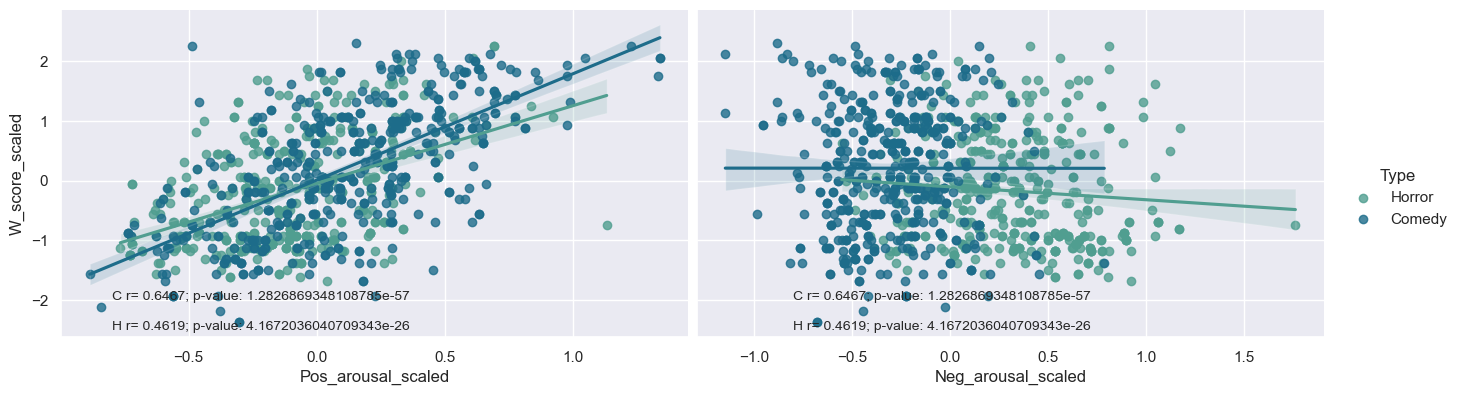

In [112]:

all_participants_cleaned_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')

W_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(
     all_participants_cleaned_df,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="Type",
     height=4,
     aspect=1.7)

W_comedy_PA_string = "C r= " + str(round(W_PA_comedy_corr[0], 4)) + "; p-value: " + str((W_PA_comedy_corr[1]))
W_horror_PA_string = "H r= " + str(round(W_PA_horror_corr[0], 4)) + "; p-value: " + str((W_PA_horror_corr[1]))
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=W_comedy_PA_string, x=-.8, y=-2, fontsize=10)
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=W_horror_PA_string, x=-.8, y=-2.5, fontsize=10)

W_comedy_NA_string = "C r= " + str(round(W_PA_comedy_corr[0], 4)) + "; p-value: " + str((W_PA_comedy_corr[1]))
W_horror_NA_string = "H r= " + str(round(W_PA_horror_corr[0], 4)) + "; p-value: " + str((W_PA_horror_corr[1]))
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=W_comedy_NA_string, x=-.8, y=-2, fontsize=10)
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=W_horror_NA_string, x=-.8, y=-2.5, fontsize=10)

Text(0.5, 1.0, 'Standard deviation of watch score for each participant')

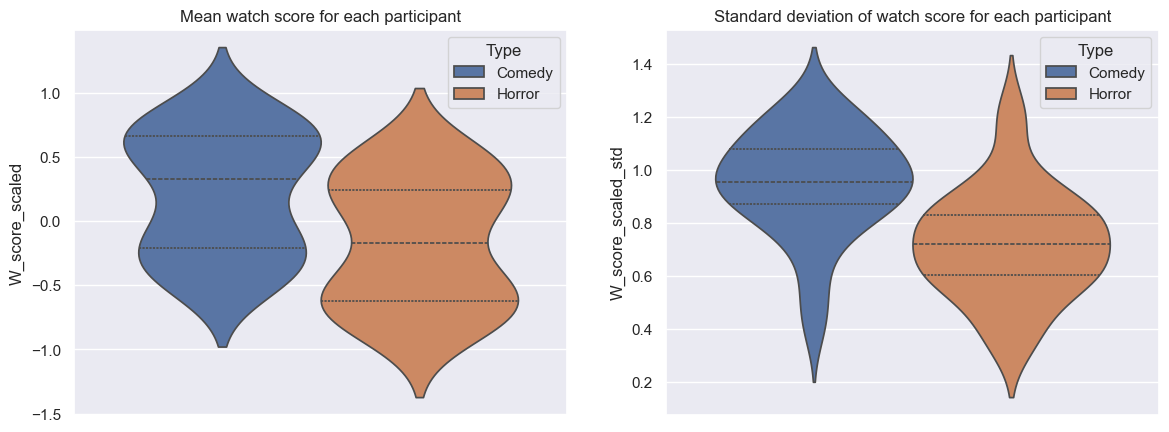

In [113]:
# Catching participants who consistently disliked horror/comedy movies. 
Individuals_mean_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False).mean()
Individuals_std_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False).std()
Individuals_mean_comedy_df["W_score_scaled_std"] = Individuals_std_comedy_df["W_score_scaled"]
Individuals_mean_comedy_df["Type"] = "Comedy"

Individuals_mean_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False).mean()
Individuals_std_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False).std()
Individuals_mean_horror_df["W_score_scaled_std"] = Individuals_std_horror_df["W_score_scaled"]
Individuals_mean_horror_df["Type"] = "Horror"

all_participants_means_df = pd.concat([Individuals_mean_comedy_df, Individuals_mean_horror_df], ignore_index=True)

sns.set(font_scale=1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", hue="Type", inner="quart", ax=axs[0])
axs[0].set_title("Mean watch score for each participant")

sns.violinplot(data=all_participants_means_df, y="W_score_scaled_std", hue="Type", inner="quart", ax=axs[1])
axs[1].set_title("Standard deviation of watch score for each participant")



In [114]:
# Get threshold for participants to exclude because the just don't like horror movies. 
Horror_w_threshold = Individuals_mean_horror_df["W_score_scaled"].describe()["50%"]
Comedy_w_threshold = Individuals_mean_comedy_df["W_score_scaled"].describe()["50%"]

#print("The threshold for the watch score for horror movies is: ", Horror_w_threshold)

Dislike_horror_list = []
Like_horror_list = []

Dislike_comedy_list = []
Like_comedy_list = []

for participant_id in range(len(participants_list)):

    if Individuals_mean_horror_df.loc[participant_id, "W_score_scaled"] < Horror_w_threshold: #0:
        Dislike_horror_list.append(participants_list[participant_id])
    else: 
        Like_horror_list.append(participants_list[participant_id])

    if Individuals_mean_comedy_df.loc[participant_id, "W_score_scaled"] < Comedy_w_threshold: #0:
        Dislike_comedy_list.append(participants_list[participant_id])
    else:
        Like_comedy_list.append(participants_list[participant_id])

print("Participants who dislike horror movies: ", Dislike_horror_list)
print("Participants who like horror movies: ", Like_horror_list)

print("\nParticipants who dislike comedy movies: ", Dislike_comedy_list)
print("Participants who like comedy movies: ", Like_comedy_list)


Participants who dislike horror movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-09', 'sub-18', 'sub-21', 'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']
Participants who like horror movies:  ['sub-01', 'sub-08', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']

Participants who dislike comedy movies:  ['sub-01', 'sub-08', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-27', 'sub-29', 'sub-31', 'sub-32', 'sub-34']
Participants who like comedy movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-09', 'sub-10', 'sub-18', 'sub-21', 'sub-25', 'sub-26', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']


In [115]:
# Create separate dataframes for participants that like and dislike horror movies. 
Like_horror_df = pd.DataFrame()
Dislike_horror_df = pd.DataFrame()

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Like_horror_list:
        Like_horror_df = pd.concat([Like_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

    if participants_list[participant_id] in Dislike_horror_list:
        Dislike_horror_df = pd.concat([Dislike_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

# Add column to main dataframe to distinguish participants that like and dislike horror movies. 
#all_subs_events_df["H_preference"] = "Like"
all_participants_means_df["H_preference"] = "Like"

#all_subs_events_df["C_preference"] = "Like"
all_participants_means_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"



In [116]:
# Create separate dataframes for participants that like and dislike horror movies. 
Like_horror_df = pd.DataFrame()
Dislike_horror_df = pd.DataFrame()

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Like_horror_list:
        Like_horror_df = pd.concat([Like_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

    if participants_list[participant_id] in Dislike_horror_list:
        Dislike_horror_df = pd.concat([Dislike_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

# Add column to main dataframe to distinguish participants that like and dislike horror movies. 
#all_subs_events_df["H_preference"] = "Like"
all_participants_means_df["H_preference"] = "Like"

#all_subs_events_df["C_preference"] = "Like"
all_participants_means_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"



/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_3413/2937040998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_subs_events_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_3413/2937040998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_subs_events_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_3413/2937040998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

<Axes: xlabel='Type', ylabel='W_score_scaled'>

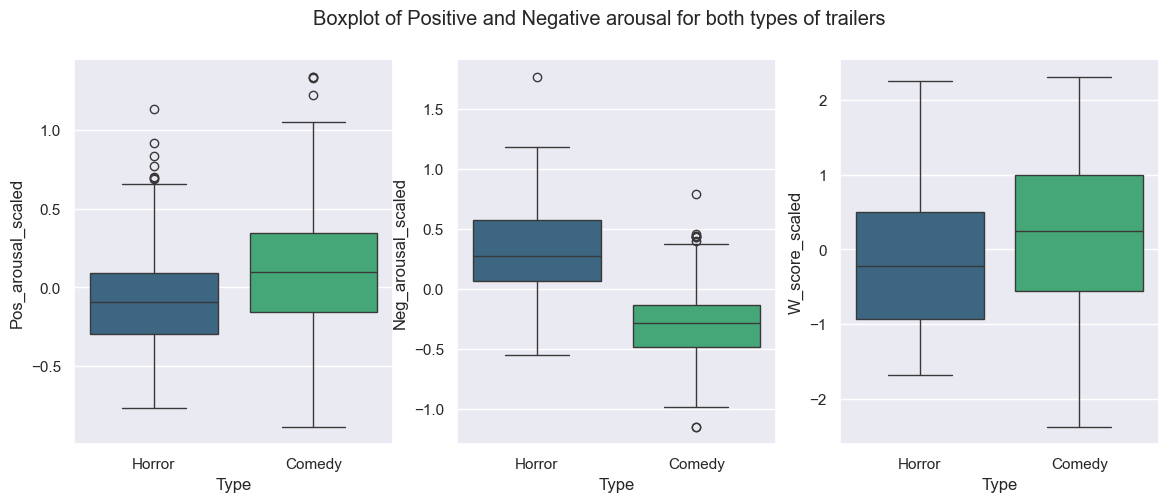

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
fig.suptitle("Boxplot of Positive and Negative arousal for both types of trailers")
sns.boxplot(data=all_subs_events_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
sns.boxplot(data=all_subs_events_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])
sns.boxplot(data=all_subs_events_df, y="W_score_scaled", x="Type", palette="viridis", ax=axs[2])


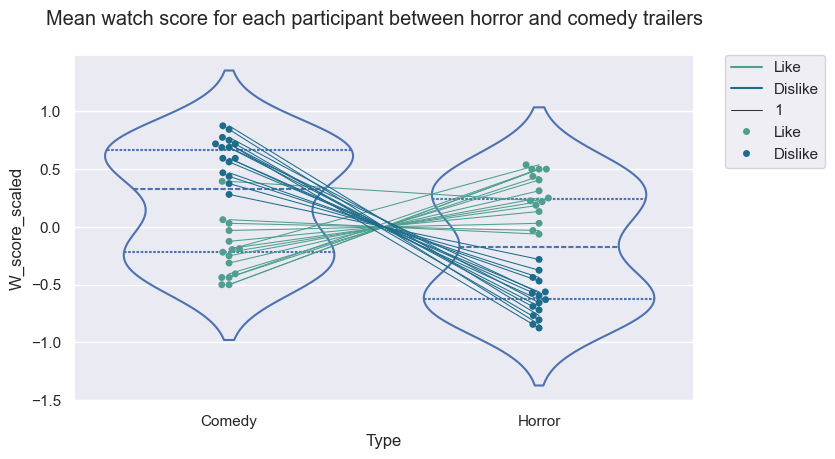

In [118]:
fig, axs = plt.subplots(figsize=(8, 4.5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", x="Type", inner="quart", fill=False, palette=None, ax=axs)

sns.lineplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="H_preference",
                 estimator=None, 
                 units="Participant",  
                 markers=True, 
                 size=1,
                 palette="crest",
                 ax=axs)

sns.swarmplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="H_preference", palette="crest", 
              dodge=False, ax=axs) 

fig.suptitle("Mean watch score for each participant between horror and comedy trailers")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #labels=["Like", "Dislike"], ,  

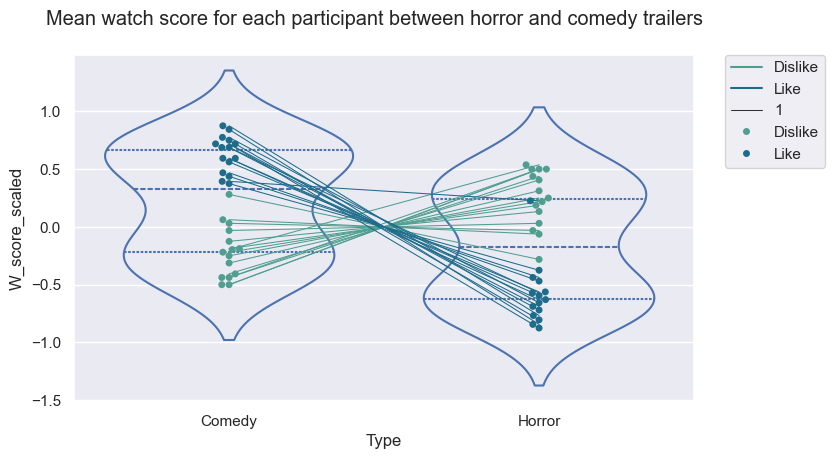

In [119]:
fig, axs = plt.subplots(figsize=(8, 4.5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", x="Type", inner="quart", fill=False, palette=None, ax=axs)

sns.lineplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="C_preference",
                 estimator=None, 
                 units="Participant",  
                 markers=True, 
                 size=1,
                 palette="crest",
                 ax=axs)

sns.swarmplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="C_preference", palette="crest", 
              dodge=False, ax=axs) 

fig.suptitle("Mean watch score for each participant between horror and comedy trailers")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


The correlation between W_score and Pos_arousal for Like horror group is: 0.5318 with a p-value of: 1.755954034856026e-18
The correlation between W_score and Neg_arousal for Like horror group is: 0.2532 with a p-value of: 9.013547331493557e-05

The correlation between W_score and Pos_arousal for Dislike horror group is: 0.3933 with a p-value of: 4.447059514847491e-10
The correlation between W_score and Neg_arousal for Dislike horror group is: -0.3382 with a p-value of: 1.1416032114972403e-07


Text(-0.5, 1.2, 'DH r= -0.3382; p-value: 1.1416032114972403e-07')

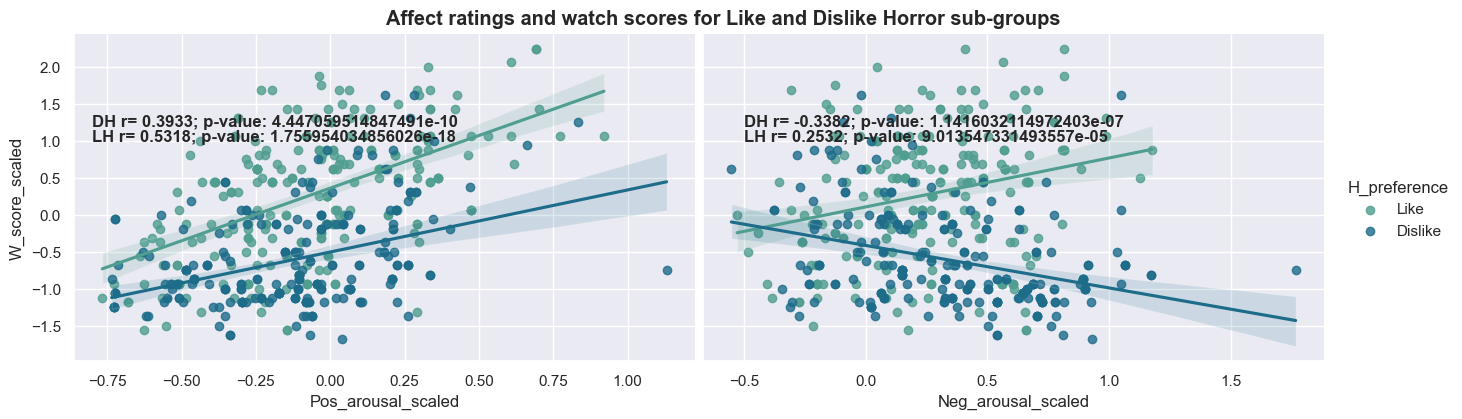

In [120]:
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Like horror group.
W_PA_LH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["Pos_arousal_scaled"])
W_NA_LH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for Like horror group is: " + str(round(W_PA_LH_corr[0], 4)) + " with a p-value of: " + str((W_PA_LH_corr[1])))
print("The correlation between W_score and Neg_arousal for Like horror group is: " + str(round(W_NA_LH_corr[0], 4)) + " with a p-value of: " + str((W_NA_LH_corr[1])))

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Dislike horror group.
W_PA_DH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["Pos_arousal_scaled"])
W_NA_DH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for Dislike horror group is: " + str(round(W_PA_DH_corr[0], 4)) + " with a p-value of: " + str((W_PA_DH_corr[1])))
print("The correlation between W_score and Neg_arousal for Dislike horror group is: " + str(round(W_NA_DH_corr[0], 4)) + " with a p-value of: " + str((W_NA_DH_corr[1])))

W_PA_NA_HorrorTrailers_plot = sns.pairplot(
     all_subs_events_horror,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="H_preference",
     height=4,
     aspect=1.7)
W_PA_NA_HorrorTrailers_plot.fig.suptitle("Affect ratings and watch scores for Like and Dislike Horror sub-groups", va="top", fontweight='bold', y=1.03)

W_LH_PA_string = "LH r= " + str(round(W_PA_LH_corr[0], 4)) + "; p-value: " + str((W_PA_LH_corr[1]))
W_DH_PA_string = "DH r= " + str(round(W_PA_DH_corr[0], 4)) + "; p-value: " + str((W_PA_DH_corr[1]))
W_PA_NA_HorrorTrailers_plot.axes[0, 0].text(s=W_LH_PA_string, x=-.8, y=1, fontsize=12, weight='bold')
W_PA_NA_HorrorTrailers_plot.axes[0, 0].text(s=W_DH_PA_string, x=-.8, y=1.2, fontsize=12, weight='bold')

W_LH_NA_string = "LH r= " + str(round(W_NA_LH_corr[0], 4)) + "; p-value: " + str((W_NA_LH_corr[1]))
W_DH_NA_string = "DH r= " + str(round(W_NA_DH_corr[0], 4)) + "; p-value: " + str((W_NA_DH_corr[1]))
W_PA_NA_HorrorTrailers_plot.axes[0, 1].text(s=W_LH_NA_string, x=-.5, y=1, fontsize=12, weight='bold')
W_PA_NA_HorrorTrailers_plot.axes[0, 1].text(s=W_DH_NA_string, x=-.5, y=1.2, fontsize=12, weight='bold')


The correlation between W_score and Pos_arousal for Like comedy group is: 0.6413 with a p-value of: 9.599778830574816e-29
The correlation between W_score and Neg_arousal for Like comedy group is: -0.0463 with a p-value of: 0.4791301852283742

The correlation between W_score and Pos_arousal for Dislike comedy group is: 0.7021 with a p-value of: 8.305935764009973e-37
The correlation between W_score and Neg_arousal for Dislike comedy group is: 0.159 with a p-value of: 0.013882564635611026


Text(-0.5, 2.3, 'DC r= 0.159; p-value: 0.013882564635611026')

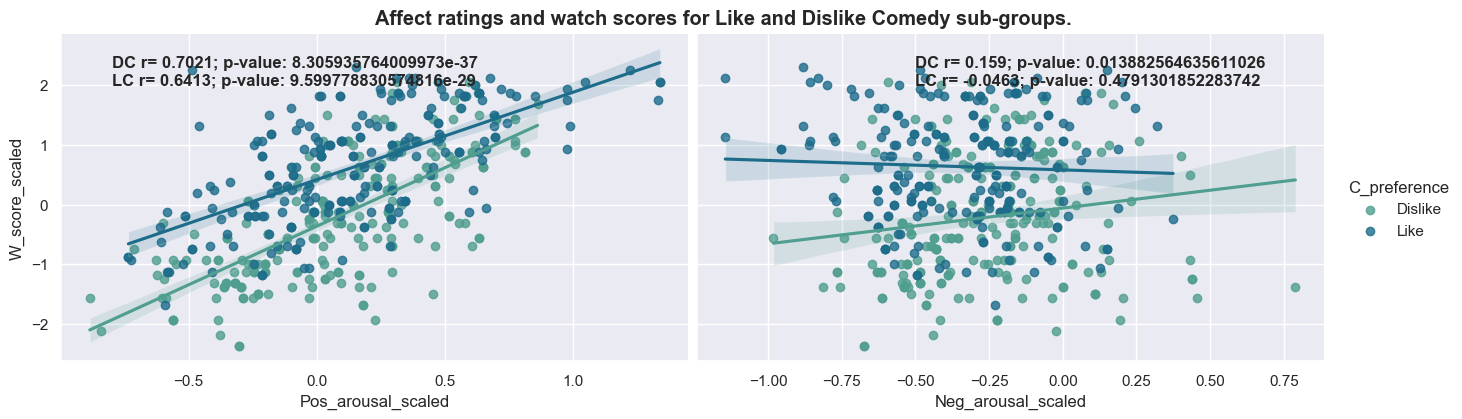

In [121]:
all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Like comedy group.
W_PA_LC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["Pos_arousal_scaled"])
W_NA_LC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for Like comedy group is: " + str(round(W_PA_LC_corr[0], 4)) + " with a p-value of: " + str((W_PA_LC_corr[1])))
print("The correlation between W_score and Neg_arousal for Like comedy group is: " + str(round(W_NA_LC_corr[0], 4)) + " with a p-value of: " + str((W_NA_LC_corr[1])))
      
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Dislike comedy group.
W_PA_DC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["Pos_arousal_scaled"])
W_NA_DC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for Dislike comedy group is: " + str(round(W_PA_DC_corr[0], 4)) + " with a p-value of: " + str((W_PA_DC_corr[1])))
print("The correlation between W_score and Neg_arousal for Dislike comedy group is: " + str(round(W_NA_DC_corr[0], 4)) + " with a p-value of: " + str((W_NA_DC_corr[1])))

W_PA_NA_ComedyTrailers_plot = sns.pairplot(
     all_subs_events_comedy,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="C_preference",
     height=4,
     aspect=1.7)
W_PA_NA_ComedyTrailers_plot.fig.suptitle("Affect ratings and watch scores for Like and Dislike Comedy sub-groups.", va="top", fontweight='bold', y=1.03)

W_LC_PA_string = "LC r= " + str(round(W_PA_LC_corr[0], 4)) + "; p-value: " + str((W_PA_LC_corr[1]))
W_DC_PA_string = "DC r= " + str(round(W_PA_DC_corr[0], 4)) + "; p-value: " + str((W_PA_DC_corr[1]))

W_PA_NA_ComedyTrailers_plot.axes[0, 0].text(s=W_LC_PA_string, x=-.8, y=2, fontsize=12, weight='bold')
W_PA_NA_ComedyTrailers_plot.axes[0, 0].text(s=W_DC_PA_string, x=-.8, y=2.3, fontsize=12, weight='bold')

W_LC_NA_string = "LC r= " + str(round(W_NA_LC_corr[0], 4)) + "; p-value: " + str((W_NA_LC_corr[1]))
W_DC_NA_string = "DC r= " + str(round(W_NA_DC_corr[0], 4)) + "; p-value: " + str((W_NA_DC_corr[1]))

W_PA_NA_ComedyTrailers_plot.axes[0, 1].text(s=W_LC_NA_string, x=-.5, y=2, fontsize=12, weight='bold')
W_PA_NA_ComedyTrailers_plot.axes[0, 1].text(s=W_DC_NA_string, x=-.5, y=2.3, fontsize=12, weight='bold')

In [122]:
all_subs_events_df["F_score_scaled"] = 0

for sub_id in participants_list: 

    # Calculate mean feel score for current subject. 
    current_sub_mean_f = all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"].mean()


    # Calculate std feel score for current subject. 
    current_sub_std_f = all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"].std()

    # Mean center F score for current participant.
    all_subs_events_df.loc[all_subs_events_df["Participant"] == sub_id, "F_score_scaled"] = (all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"] - current_sub_mean_f)/current_sub_std_f


In [123]:
all_participants_means_df.columns[50]

'MPFC_pos_peak_z'

In [124]:
# Plot..
# sub_group_means_horror = all_participants_means_df.groupby(['H_preference']).mean()
# sub_group_means_comedy = all_participants_means_df.groupby(['C_preference']).mean()

# sub_group_means_horror["kind"] = ["Dislike_H", "Like_H"]
# sub_group_means_comedy["kind"] = ["Dislike_C", "Like_C"]

# # concat 
# sub_group_means = pd.concat([sub_group_means_horror, sub_group_means_comedy], axis=0)

# sns.scatterplot(sub_group_means, x="Neg_arousal_scaled", y="Pos_arousal_scaled", hue="kind")




## Neural Activation Whole Average 

In [125]:
#test_title = "Correlations for whole activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "whole", test_title)

In [126]:

#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "whole", "Correlations for whole activation for both types of trailers")


## Neural Activation Offset 

In [127]:
#offset_title = "Correlations for offset activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "offset", offset_title)

In [128]:
#offset_title = 'Offset time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "offset", offset_title)


# Neural activation middle

In [129]:
#middle_title = "Correlations for middle activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "middle", middle_title)

In [130]:
#middle_title = 'Middle time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "middle", middle_title)

## Neural activation onset

In [131]:
#onset_title = "Correlations for onset activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "onset", onset_title)

In [132]:
#onset_title = 'Onset time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "onset", onset_title)

## Individual peak (max)

In [133]:
#pos_peak_title = "Correlations for individuals positive peak activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "ind_peaks_pos", pos_peak_title)

In [134]:
#pos_peak_title = 'Individual positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "ind_peaks_pos", pos_peak_title)

## Individual peaks (min)

In [135]:
# neg_peak_title = "Correlations for individual negative peak activation for both types of trailers"
# compute_and_plot_corrs(all_participants_cleaned_df, "ind_peaks_neg", neg_peak_title)

In [136]:
#neg_peak_title = 'Individuals negative peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "ind_peaks_neg", neg_peak_title)

In [137]:
#collective_peak_title = 'Individuals collective positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "dem_peak_pos", collective_peak_title)

In [138]:
#collective_peak_title = 'Individuals avg positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "avg_peak_yes_pos", collective_peak_title)

## Neural ISC

In [139]:
# Correlation with Positive Arousal.
NAcc_PA_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["Pos_arousal_scaled"])
AIns_PA_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["Pos_arousal_scaled"])
MPFC_PA_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["Pos_arousal_scaled"])

# Correlation with Negative Arousal.
NAcc_NA_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["Neg_arousal_scaled"])
AIns_NA_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["Neg_arousal_scaled"])
MPFC_NA_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["Neg_arousal_scaled"])

# Correlation with Watch Scores.
NAcc_W_ISC_All_corr = pearsonr(all_subs_events_df["NAcc_ISC"], all_subs_events_df["W_score_scaled"])
AIns_W_ISC_All_corr = pearsonr(all_subs_events_df["AIns_ISC"], all_subs_events_df["W_score_scaled"])
MPFC_W_ISC_All_corr = pearsonr(all_subs_events_df["MPFC_ISC"], all_subs_events_df["W_score_scaled"])

print("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_All_corr[1])))


For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: 0.03189 with a p-value of: 0.32799118657567855
For both types of trailers, the correlation between AIns ISC activation and positive arousal is: 0.01654 with a p-value of: 0.6118731292850822
For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: 0.08729 with a p-value of: 0.007319159243658458

For both types of trailers, the correlation between NAcc ISC activation and negative arousal is: 0.04037 with a p-value of: 0.21552486121181735
For both types of trailers, the correlation between AIns ISC activation and negative arousal is: -0.01827 with a p-value of: 0.5751976411909228
For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: 0.03569 with a p-value of: 0.27363216022956416

For both types of trailers, the correlation between NAcc ISC activation and watch scores is: 0.02512 with a p-value of: 0.441034668277

In [140]:
#ISC_all_corr = [NAcc_PA_ISC_All_corr, NAcc_NA_ISC_All_corr, NAcc_W_ISC_All_corr, AIns_PA_ISC_All_corr, AIns_NA_ISC_All_corr, AIns_W_ISC_All_corr, MPFC_PA_ISC_All_corr, MPFC_NA_ISC_All_corr, MPFC_W_ISC_All_corr]
#plot_correlations(all_subs_events_df, ISC_all_corr, "ISC", "Correlations for ISC activation for both types of trailers")


In [141]:
# ISC Neural Activation and PA-NA for Comedy Trailers.
NAcc_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["Pos_arousal_scaled"])
AIns_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["Pos_arousal_scaled"])
MPFC_PA_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["Pos_arousal_scaled"])

NAcc_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["Neg_arousal_scaled"])
AIns_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["Neg_arousal_scaled"])
MPFC_NA_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["Neg_arousal_scaled"])

NAcc_W_ISC_C_corr = pearsonr(all_subs_events_comedy["NAcc_ISC"], all_subs_events_comedy["W_score_scaled"])
AIns_W_ISC_C_corr = pearsonr(all_subs_events_comedy["AIns_ISC"], all_subs_events_comedy["W_score_scaled"])
MPFC_W_ISC_C_corr = pearsonr(all_subs_events_comedy["MPFC_ISC"], all_subs_events_comedy["W_score_scaled"])

print("For comedy trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_C_corr[1])))

print("\nFor comedy trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_C_corr[1])))
print("For comedy trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_C_corr[1])))
print("For comedy trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_C_corr[1])))


For comedy trailers, the correlation between NAcc ISC activation and positive arousal is: 0.04533 with a p-value of: 0.32420022038721946
For comedy trailers, the correlation between AIns ISC activation and positive arousal is: -0.01176 with a p-value of: 0.798154431144552
For comedy trailers, the correlation between MPFC ISC activation and positive arousal is: 0.06304 with a p-value of: 0.17016617417509158

For comedy trailers, the correlation between NAcc ISC activation and negative arousal is: 0.04005 with a p-value of: 0.3838332685907573
For comedy trailers, the correlation between AIns ISC activation and negative arousal is: 0.03879 with a p-value of: 0.39895135656653624
For comedy trailers, the correlation between MPFC ISC activation and negative arousal is: 0.06025 with a p-value of: 0.18992545337065997

For comedy trailers, the correlation between NAcc ISC activation and watch scores is: 0.04091 with a p-value of: 0.3737168329531606
For comedy trailers, the correlation between A

In [142]:
# ISC Neural Activation and PA-NA for Horror Trailers.
NAcc_PA_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["Pos_arousal_scaled"])
AIns_PA_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["Pos_arousal_scaled"])
MPFC_PA_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["Pos_arousal_scaled"])

NAcc_NA_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["Neg_arousal_scaled"])
AIns_NA_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["Neg_arousal_scaled"])
MPFC_NA_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["Neg_arousal_scaled"])

NAcc_W_ISC_H_corr = pearsonr(all_subs_events_horror["NAcc_ISC"], all_subs_events_horror["W_score_scaled"])
AIns_W_ISC_H_corr = pearsonr(all_subs_events_horror["AIns_ISC"], all_subs_events_horror["W_score_scaled"])
MPFC_W_ISC_H_corr = pearsonr(all_subs_events_horror["MPFC_ISC"], all_subs_events_horror["W_score_scaled"])

print("For horror trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_H_corr[1])))

print("\nFor horror trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_H_corr[1])))
print("For horror trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_H_corr[1])))
print("For horror trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_H_corr[1])))



For horror trailers, the correlation between NAcc ISC activation and positive arousal is: 0.04018 with a p-value of: 0.38577852591208633
For horror trailers, the correlation between AIns ISC activation and positive arousal is: -0.00122 with a p-value of: 0.9790619127243543
For horror trailers, the correlation between MPFC ISC activation and positive arousal is: 0.09456 with a p-value of: 0.04088009825814152

For horror trailers, the correlation between NAcc ISC activation and negative arousal is: 0.01547 with a p-value of: 0.7384792639662481
For horror trailers, the correlation between AIns ISC activation and negative arousal is: 0.06373 with a p-value of: 0.16869551350039305
For horror trailers, the correlation between MPFC ISC activation and negative arousal is: 0.12405 with a p-value of: 0.0072147382757758215

For horror trailers, the correlation between NAcc ISC activation and watch scores is: 0.0213 with a p-value of: 0.6458125073567058
For horror trailers, the correlation between

In [143]:
#ISC_comedy_corr = [NAcc_PA_ISC_C_corr, NAcc_NA_ISC_C_corr, NAcc_W_ISC_C_corr, AIns_PA_ISC_C_corr, AIns_NA_ISC_C_corr, AIns_W_ISC_C_corr, MPFC_PA_ISC_C_corr, MPFC_NA_ISC_C_corr, MPFC_W_ISC_C_corr]
#ISC_horror_corr = [NAcc_PA_ISC_H_corr, NAcc_NA_ISC_H_corr, NAcc_W_ISC_H_corr, AIns_PA_ISC_H_corr, AIns_NA_ISC_H_corr, AIns_W_ISC_H_corr, MPFC_PA_ISC_H_corr, MPFC_NA_ISC_H_corr, MPFC_W_ISC_H_corr]
#plot_correlations3_bothTrailers(all_participants_cleaned_df, "ISC", ISC_comedy_corr, ISC_horror_corr, "Correlations for ISC activation for both types of trailers")


# Correlation Matrix for all variables.

In [144]:
relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
       'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
       'NAcc_offset', 'AIns_offset', 'MPFC_offset', 
       #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
       #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 
       'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',
       "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
       #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg",
       "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
       #"NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no",
       "NAcc_dem_slope_pos", "AIns_dem_slope_pos", "MPFC_dem_slope_pos", 
       "NAcc_dem_slope_pos_yes" , "AIns_dem_slope_pos_yes", "MPFC_dem_slope_pos_yes",
       "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
       "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos',
       "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
       "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2',
       #'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 
       'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
       #'AIns_dem_peak_pos7','AIns_dem_peak_pos8', 
       #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
       #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4',
       "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
       "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
       "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"
       #'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f', 'NAcc_a', 'AIns_a', 'MPFC_a',
       #'NAcc_MPFC', 'AIns_MPFC', 'NAcc_AIns', 'NAcc_MPFC_ISFC', 'AIns_MPFC_ISFC', 'NAcc_AIns_ISFC', 'AIns_NAcc_ISFC',
       #'MPFC_NAcc_ISFC', 'MPFC_AIns_ISFC'
       ]

all_subs_events_matrix = all_subs_events_df[relevant_cols]
all_subs_events_comedy_matrix = all_subs_events_comedy[relevant_cols]
all_subs_events_horror_matrix = all_subs_events_horror[relevant_cols]
Like_horror_matrix = Like_horror_df[relevant_cols]
Dislike_horror_matrix = Dislike_horror_df[relevant_cols]

all_subs_events_matrix = all_subs_events_matrix.dropna()
all_subs_events_comedy_matrix = all_subs_events_comedy_matrix.dropna()
all_subs_events_horror_matrix = all_subs_events_horror_matrix.dropna()
Like_horror_matrix = Like_horror_matrix.dropna()
Dislike_horror_matrix = Dislike_horror_matrix.dropna()

all_subs_events_corr = all_subs_events_matrix.corr()
all_subs_events_comedy_corr = all_subs_events_comedy_matrix.corr()
all_subs_events_horror_corr = all_subs_events_horror_matrix.corr()
Like_horror_corr = Like_horror_matrix.corr()
Dislike_horror_corr = Dislike_horror_matrix.corr()



<Axes: >

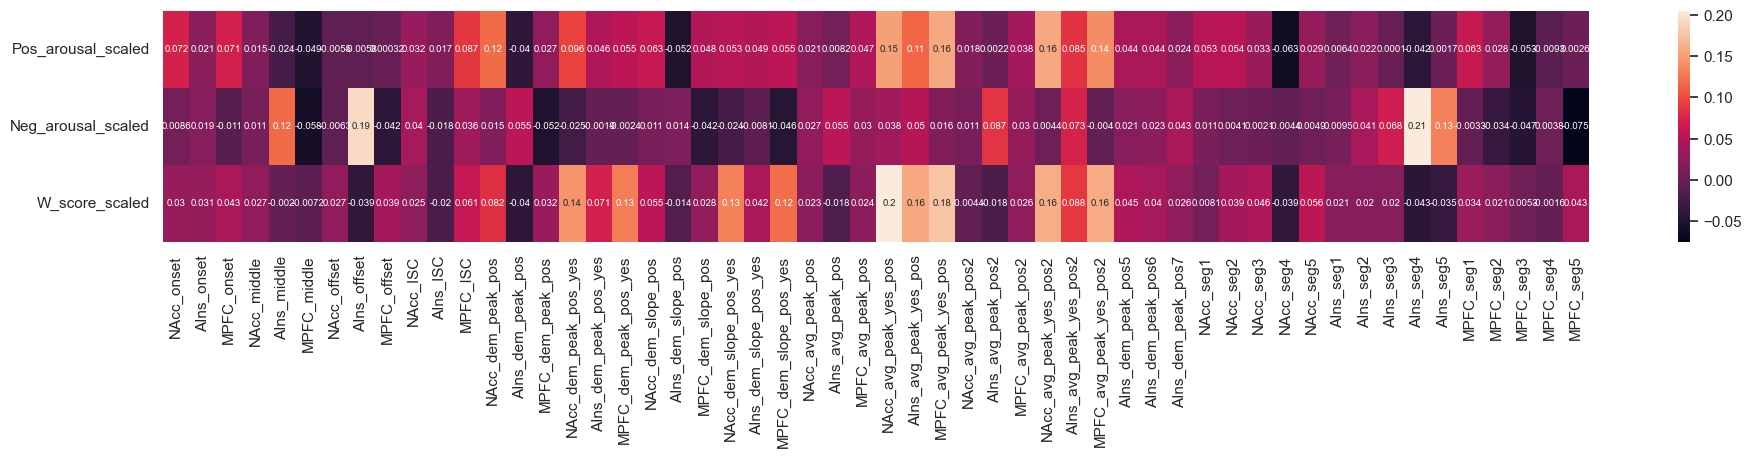

In [145]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

<Axes: >

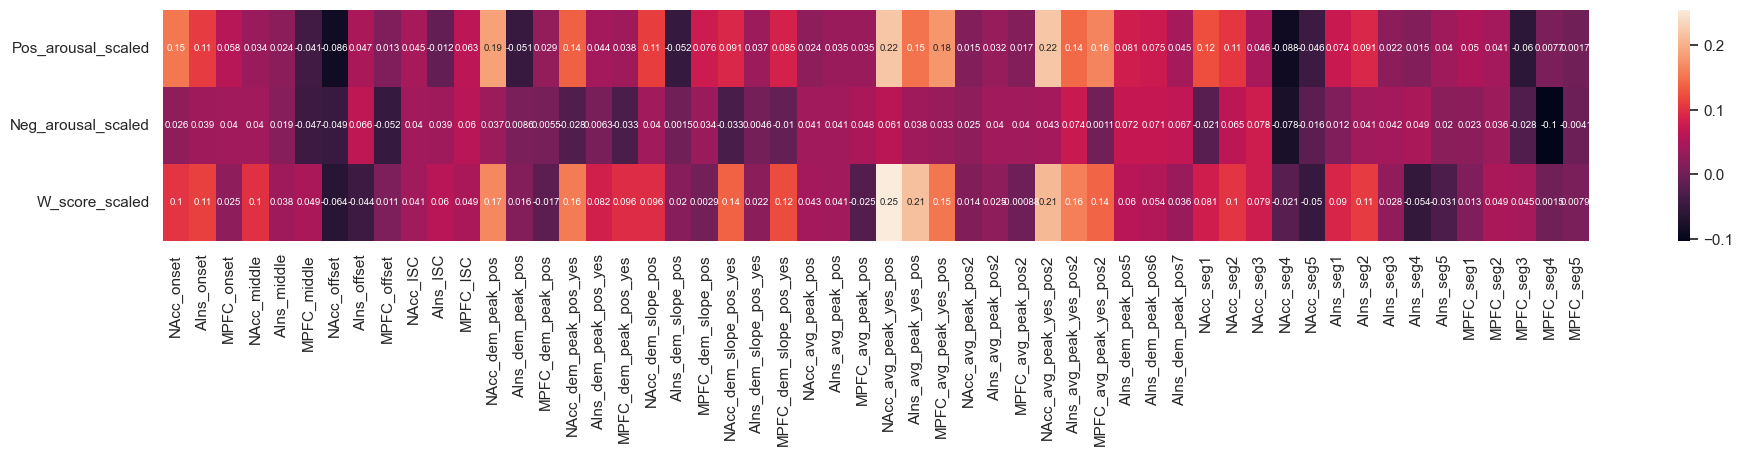

In [146]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_comedy_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

<Axes: >

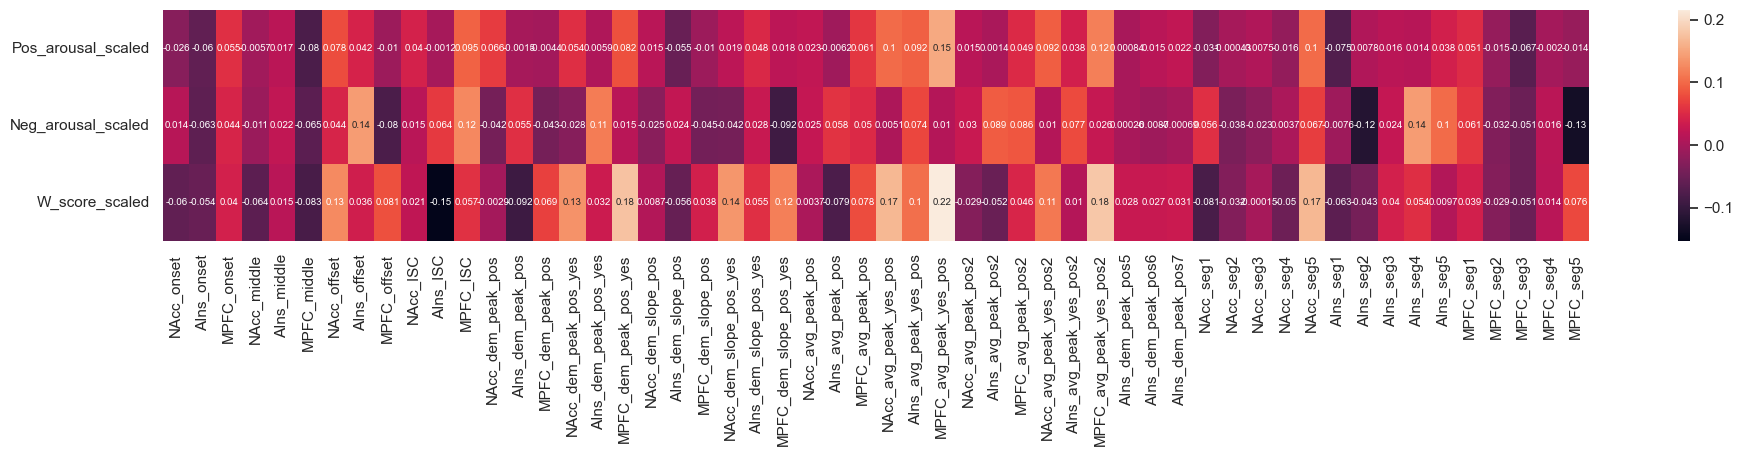

In [147]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_horror_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

### Look at Genre preference sub-groups.

<Axes: >

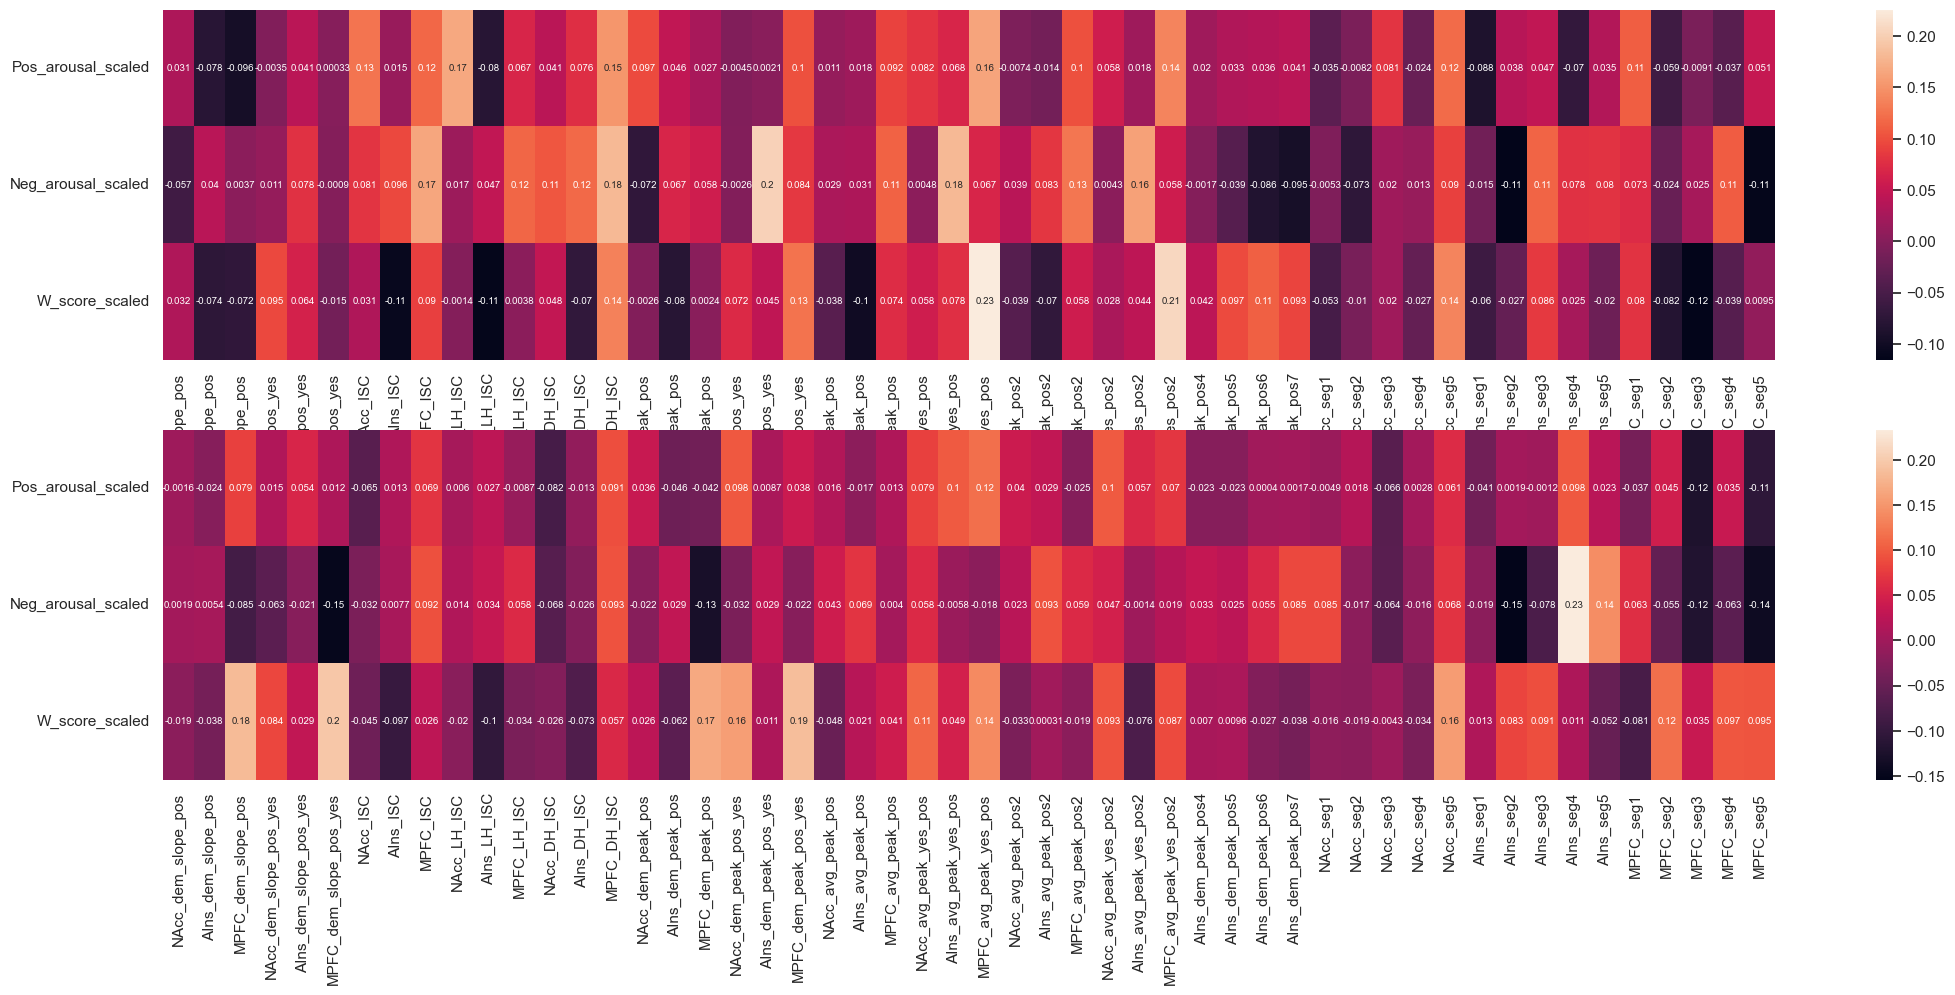

In [148]:
LH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Like") & (all_subs_events_df["Type"] == "Horror")]
DH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Dislike") & (all_subs_events_df["Type"] == "Horror")]

relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
       "NAcc_dem_slope_pos", "AIns_dem_slope_pos", "MPFC_dem_slope_pos", 
       "NAcc_dem_slope_pos_yes" , "AIns_dem_slope_pos_yes", "MPFC_dem_slope_pos_yes",
       #'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
       #'NAcc_offset', 'AIns_offset', 'MPFC_offset',
       "NAcc_ISC", "AIns_ISC", "MPFC_ISC",
       "NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC",
       "NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC",
       #"NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC", "NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC",
       #"NAcc_w", "AIns_w", #"MPFC_w", "NAcc_f", "AIns_f", "MPFC_f", "NAcc_a", "AIns_a", "MPFC_a", 
       "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
       #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg",
       "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
       #"NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no", 
       "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
       "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos',
       "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
       "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2', 
       'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
       #'AIns_dem_peak_pos8', 
       #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
       #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
       "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
       "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
       "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"]

LH_df = LH_df[relevant_cols]
DH_df = DH_df[relevant_cols]

#LH_df["Neuro_NA"] = (LH_df["AIns_avg_peak_pos6"] - (LH_df["NAcc_avg_peak_yes_pos"]/np.sqrt(2)))
#DH_df["Neuro_NA"] = (DH_df["AIns_avg_peak_pos6"] - (DH_df["NAcc_avg_peak_yes_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA2"] = (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))
# DH_df["Neuro_NA2"] = (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA3"] = (-LH_df["AIns_offset"] + (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))
# DH_df["Neuro_NA3"] = (-DH_df["AIns_offset"] + (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA4"] =  (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos"]/-np.sqrt(3)))
# DH_df["Neuro_NA4"] =  (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos"]/-np.sqrt(3)))

# LH_df["Neuro_NA5"] = (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos_yes"]/np.sqrt(2)))
# DH_df["Neuro_NA5"] = (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos_yes"]/np.sqrt(2)))

#LH_df["Neuro_NA5"] = (LH_df["NAcc_w"]*9) + (LH_df["AIns_w"]*10)
#DH_df["Neuro_NA5"] = (DH_df["AIns_dem_peak_pos"]/np.sqrt(2)) - (DH_df["NAcc_dem_peak_pos"])

#LH_df["Neuro_NA6"] = (LH_df["AIns_dem_peak_neg"]) + (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2))
#DH_df["Neuro_NA6"] = (DH_df["AIns_dem_peak_neg"]) + (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2))


LH_df = LH_df.dropna()
DH_df = DH_df.dropna()

LH_corr = LH_df.corr()
DH_corr = DH_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(26, 10), sharex=False) 

sns.heatmap(LH_corr.iloc[:3, 3:], ax=axs[0], annot=True, annot_kws={'size':7})

sns.heatmap(DH_corr.iloc[:3, 3:], ax=axs[1], annot=True, annot_kws={'size':7})


<Axes: >

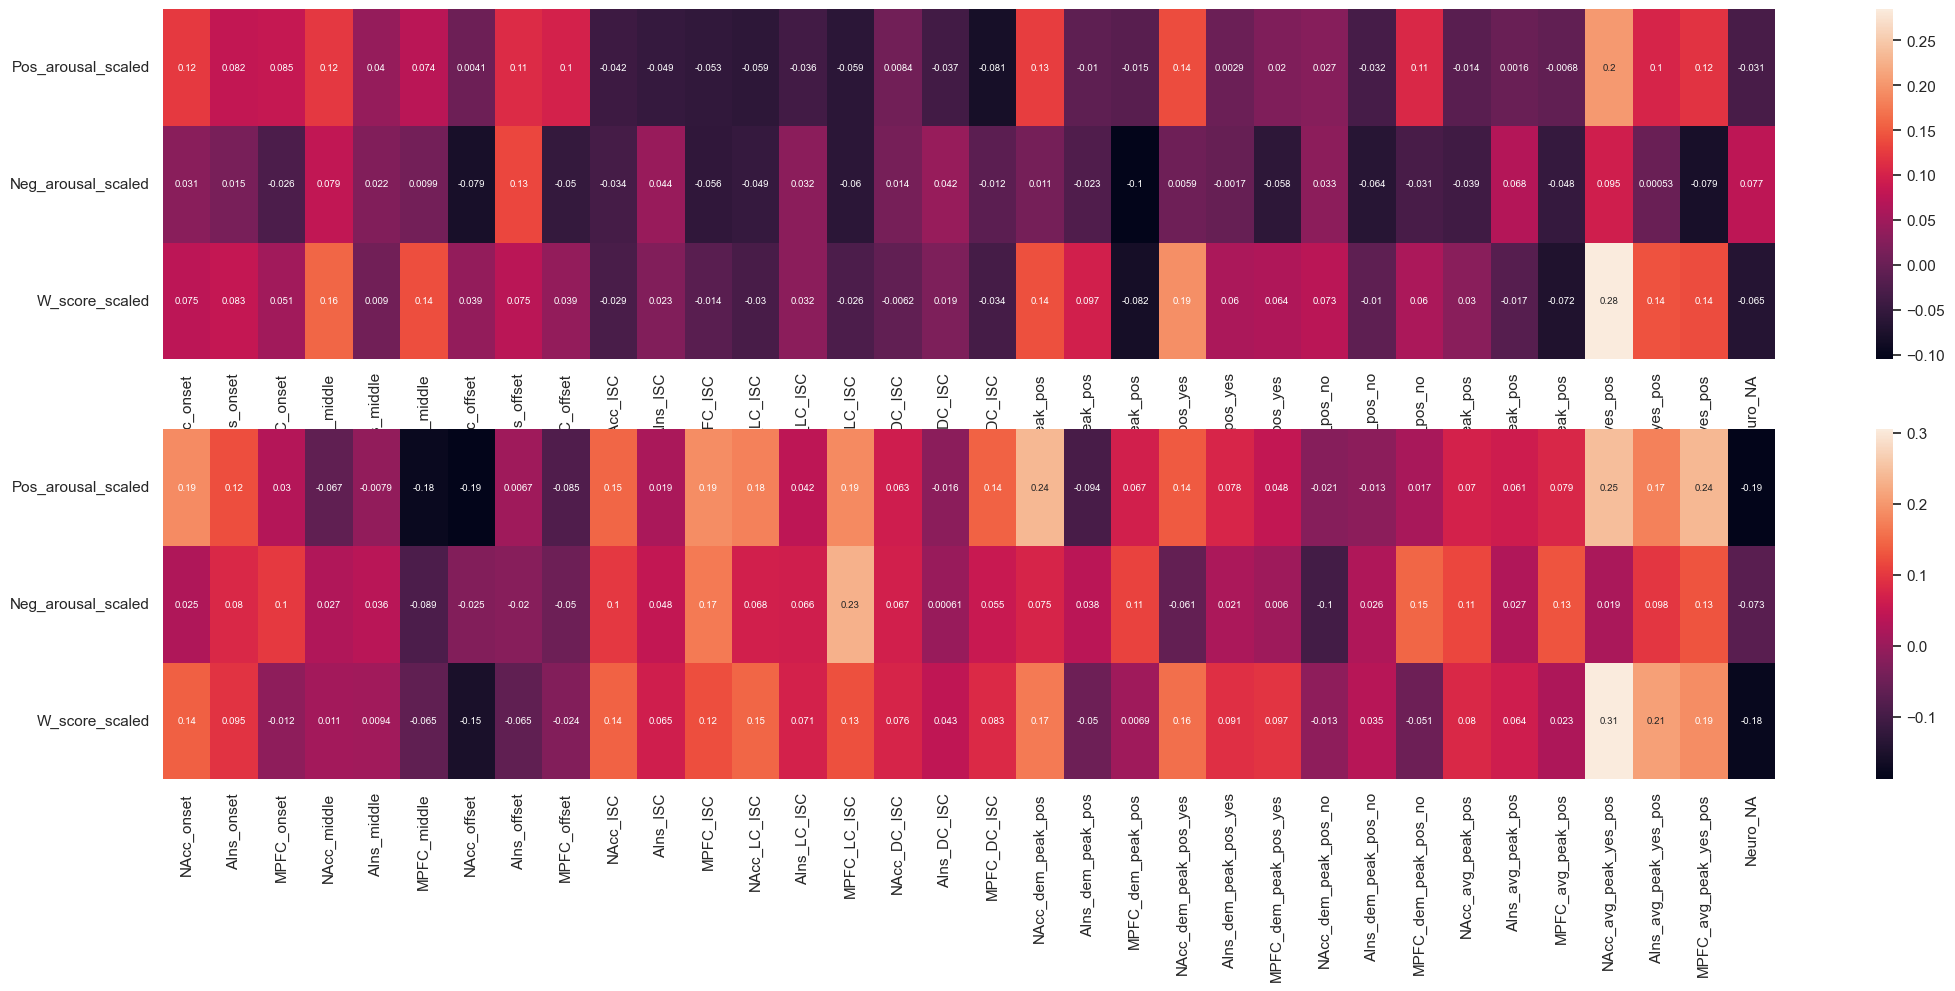

In [149]:
LC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Like") & (all_subs_events_df["Type"] == "Comedy")]
DC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Dislike") & (all_subs_events_df["Type"] == "Comedy")]

relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
         'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
         'NAcc_offset', 'AIns_offset', 'MPFC_offset', "NAcc_ISC", "AIns_ISC", "MPFC_ISC",
         "NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC", "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC",
         "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
         #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg", 
         "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
         "NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no", 
         "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
         "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos',
         # "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
         # "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2', 
         # 'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
         # 'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
         # 'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
         ]

LC_df = LC_df[relevant_cols]
DC_df = DC_df[relevant_cols]

LC_df["Neuro_NA"] = (LC_df["AIns_offset"] - (LC_df["NAcc_dem_peak_pos"]/np.sqrt(2)))
DC_df["Neuro_NA"] = (DC_df["AIns_offset"] - (DC_df["NAcc_dem_peak_pos"]/np.sqrt(2)))

LC_df = LC_df.dropna()
DC_df = DC_df.dropna()

LC_corr = LC_df.corr()
DC_corr = DC_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(26, 10), sharex=False)

sns.heatmap(LC_corr.iloc[:3, 3:], ax=axs[0], annot=True, annot_kws={'size':7})

sns.heatmap(DC_corr.iloc[:3, 3:], ax=axs[1], annot=True, annot_kws={'size':7})

# Format data for LMM analysis.

In [150]:
# Save data from individual choice analysis. 
all_subs_events_df.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Comedy.csv')
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Horror.csv')

In [151]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

root_path = os.getcwd()

Current working dir : /Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData


In [152]:
# Filter some noise before calculating neural mean activation (for aggregate prediciton).

drop_threshold1 = 1.25 #3 #1.25 #2.5
drop_threshold2 = -1.25 #-3 #-1.25 #-2.5

all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_onset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_onset_z'] < drop_threshold2) | 
                                        (all_subs_events_df['AIns_onset_z'] < drop_threshold1) | (all_subs_events_df['AIns_onset_z'] < drop_threshold2) | 
                                        (all_subs_events_df['MPFC_onset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_onset_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_middle_z'] < drop_threshold1) | (all_subs_events_df['NAcc_middle_z'] < drop_threshold2) | 
                                        (all_subs_events_df['AIns_middle_z'] < drop_threshold1) | (all_subs_events_df['AIns_middle_z'] < drop_threshold2) | 
                                        (all_subs_events_df['MPFC_middle_z'] < drop_threshold1) | (all_subs_events_df['MPFC_middle_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_offset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_offset_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_offset_z'] < drop_threshold1) | (all_subs_events_df['AIns_offset_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_offset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_offset_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_whole_z'] < drop_threshold1) | (all_subs_events_df['NAcc_whole_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_whole_z'] < drop_threshold1) | (all_subs_events_df['AIns_whole_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_whole_z'] < drop_threshold1) | (all_subs_events_df['MPFC_whole_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold2)]
all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold2) |
                                        (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold2)]

print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)

The shape of the dataframe after dropping rows is:  (823, 287)


In [153]:
# Get average neural signals for each trailer. 
aggregate_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False).mean()
aggregate_df.reset_index(inplace=True)

# Create df with only people that said 'yes' to Watch questions. 
all_participants_cleaned_yes_df = all_participants_cleaned_df[all_participants_cleaned_df["Watch_choice"] == "Yes"]
aggregate_yes_df = all_participants_cleaned_yes_df.groupby("Trailer", as_index=False, dropna=False).mean()
aggregate_yes_df.reset_index(inplace=True)

Like_horror_aggreate_df = Like_horror_df.groupby("Trailer", as_index=False, dropna=False).mean()
Like_horror_aggreate_df.reset_index(inplace=True)
Like_horror_aggreate_df["Type"] = "horror"

# Get average for Like-Comedy (LC).
LC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Like") & (all_subs_events_df["Type"] == "Comedy")]
LC_aggregate_df = LC_df.groupby("Trailer", as_index=False, dropna=False).mean()
LC_aggregate_df.reset_index(inplace=True)
LC_aggregate_df["Type"] = "comedy"

LC_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Comedy")]
LC_aggregate_yes_df = LC_yes_df.groupby("Trailer", as_index=False, dropna=False).mean()
LC_aggregate_yes_df.reset_index(inplace=True)
LC_aggregate_yes_df["Type"] = "comedy"

# Get average for Like-Horror (LH).
LH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Like") & (all_subs_events_df["Type"] == "Horror")]
LH_aggregate_df = LH_df.groupby("Trailer", as_index=False, dropna=False).mean()
LH_aggregate_df.reset_index(inplace=True)
LH_aggregate_df["Type"] = "horror"

LH_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Horror")]
LH_aggregate_yes_df = LH_yes_df.groupby("Trailer", as_index=False, dropna=False).mean()
LH_aggregate_yes_df.reset_index(inplace=True)
LH_aggregate_yes_df["Type"] = "horror"




/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_3413/1409796046.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LC_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Comedy")]
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_3413/1409796046.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Horror")]


In [154]:
# Create lists to store values. 
NAcc_trailer_peak_pos = []
AIns_trailer_peak_pos = []
MPFC_trailer_peak_pos = []

NAcc_trailer_peak_pos_id = []
AIns_trailer_peak_pos_id = []
MPFC_trailer_peak_pos_id = []

NAcc_trailer_peak_pos_yes = []
AIns_trailer_peak_pos_yes = []
MPFC_trailer_peak_pos_yes = []

# Define keys. 
NAcc_TRs_keys = ['NAcc_TR1', 'NAcc_TR2', 'NAcc_TR3', 'NAcc_TR4', 'NAcc_TR5', 
                'NAcc_TR6', 'NAcc_TR7', 'NAcc_TR8', 'NAcc_TR9', 'NAcc_TR10',
                'NAcc_TR11', 'NAcc_TR12', 'NAcc_TR13', 'NAcc_TR14', 'NAcc_TR15']

AIns_TRs_keys = ['AIns_TR1', 'AIns_TR2', 'AIns_TR3', 'AIns_TR4', 'AIns_TR5',
                'AIns_TR6', 'AIns_TR7', 'AIns_TR8', 'AIns_TR9', 'AIns_TR10',
                'AIns_TR11', 'AIns_TR12', 'AIns_TR13', 'AIns_TR14', 'AIns_TR15']

MPFC_TRs_keys = ['MPFC_TR1', 'MPFC_TR2', 'MPFC_TR3', 'MPFC_TR4', 'MPFC_TR5',
                'MPFC_TR6', 'MPFC_TR7', 'MPFC_TR8', 'MPFC_TR9', 'MPFC_TR10',
                'MPFC_TR11', 'MPFC_TR12', 'MPFC_TR13', 'MPFC_TR14', 'MPFC_TR15']

# Calculate each trailer peak activation.
for trailer_id in range(aggregate_df.shape[0]):
    
    # Get time course for each region.
    NAcc_time_course = np.array(aggregate_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course = np.array(aggregate_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course = np.array(aggregate_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    # Get peak activation for each region.
    NAcc_peak_pos, NAcc_peak_pos_id = get_trailer_peak(NAcc_time_course, "max")
    AIns_peak_pos, AIns_peak_pos_id = get_trailer_peak(AIns_time_course, "max")
    MPFC_peak_pos, MPFC_peak_pos_id = get_trailer_peak(MPFC_time_course, "max")

    # NAcc_peak_neg = get_trailer_peak(NAcc_time_course, "min")
    # AIns_peak_neg = get_trailer_peak(AIns_time_course, "min")
    # MPFC_peak_neg = get_trailer_peak(MPFC_time_course, "min")

    NAcc_peak_pos_yes, _ = get_trailer_peak(NAcc_time_course_yes, "max")
    AIns_peak_pos_yes, _ = get_trailer_peak(AIns_time_course_yes, "max")
    MPFC_peak_pos_yes, _ = get_trailer_peak(MPFC_time_course_yes, "max")

    # Append values to lists.
    NAcc_trailer_peak_pos.append(NAcc_peak_pos)
    AIns_trailer_peak_pos.append(AIns_peak_pos)
    MPFC_trailer_peak_pos.append(MPFC_peak_pos)

    NAcc_trailer_peak_pos_id.append(NAcc_peak_pos_id)
    AIns_trailer_peak_pos_id.append(AIns_peak_pos_id)
    MPFC_trailer_peak_pos_id.append(MPFC_peak_pos_id)

    # NAcc_trailer_peak_neg.append(NAcc_peak_neg)
    # AIns_trailer_peak_neg.append(AIns_peak_neg)
    # MPFC_trailer_peak_neg.append(MPFC_peak_neg)

    NAcc_trailer_peak_pos_yes.append(NAcc_peak_pos_yes)
    AIns_trailer_peak_pos_yes.append(AIns_peak_pos_yes)
    MPFC_trailer_peak_pos_yes.append(MPFC_peak_pos_yes)

# Add values to dataframe.
aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos
aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos
aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos

aggregate_df["NAcc_trailer_peak_pos_id"] = NAcc_trailer_peak_pos_id
aggregate_df["AIns_trailer_peak_pos_id"] = AIns_trailer_peak_pos_id
aggregate_df["MPFC_trailer_peak_pos_id"] = MPFC_trailer_peak_pos_id

# aggregate_df["NAcc_trailer_peak_neg"] = NAcc_trailer_peak_neg
# aggregate_df["AIns_trailer_peak_neg"] = AIns_trailer_peak_neg
# aggregate_df["MPFC_trailer_peak_neg"] = MPFC_trailer_peak_neg

aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_pos_yes
aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_pos_yes
aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_pos_yes

aggregate_df.head()

index Trailer  Onset  Offset  Duration   W_score   A_score   F_score  \
0      0     rc1  108.0   138.0      30.0  3.076923  2.576923  3.576923   
1      1    rc10  568.0   598.0      30.0  2.321429  2.035714  3.107143   
2      2    rc11  512.0   542.0      30.0  2.222222  1.814815  3.333333   
3      3    rc12  656.0   686.0      30.0  1.960000  1.720000  3.000000   
4      4     rc2  108.0   138.0      30.0  2.000000  1.758621  2.931034   

   NAcc_onset  AIns_onset  ...  F_score_scaled  NAcc_trailer_peak_pos  \
0    0.061605   -0.052206  ...        1.074569               0.074787   
1   -0.021499   -0.051319  ...        0.553533               0.083897   
2    0.021644    0.046123  ...        0.790334               0.035853   
3   -0.064068   -0.046391  ...        0.425535               0.050609   
4    0.013679    0.008041  ...        0.391333               0.052423   

   AIns_trailer_peak_pos  MPFC_trailer_peak_pos  NAcc_trailer_peak_pos_id  \
0               0.012165               0.063170                         3   
1              -0.019810               0.061387                         8   
2               0.059051               0.195588                         2   
3               0.019919               0.168022                        11   
4               0.066620               0.229904                         1   

   AIns_trailer_peak_pos_id  MPFC_trailer_peak_pos_id  \
0                        13                        11   
1                        14                         1   
2                         4                         2   
3                        12                         7   
4                         1                         0   

   NAcc_trailer_peak_pos_yes  AIns_trailer_peak_pos_yes  \
0                   0.113875                   0.040987   
1                   0.104820                   0.027027   
2                   0.092145                   0.142033   
3                   0.089002                   0.096288   
4                   0.142966                   0.164480   

   MPFC_trailer_peak_pos_yes  
0                   0.094687  
1                   0.149081  
2                   0.212013  
3                   0.312840  
4                   0.126861  

[5 rows x 291 columns]

In [155]:
# Get list of trailers in dataframe.
all_trailer_list = aggregate_df["Trailer"].unique().tolist()
horror_trailer_list = aggregate_df["Trailer"].unique().tolist()
comedy_trailer_list = LC_df["Trailer"].unique().tolist()

# Calculate trailer peak for horror sub-group. 
NAcc_trailer_peak_pos_LH = []
AIns_trailer_peak_pos_LH = []
MPFC_trailer_peak_pos_LH = []

NAcc_trailer_peak_yes_LH = []
AIns_trailer_peak_yes_LH = []
MPFC_trailer_peak_yes_LH = []

# Calculate each trailer peak activation.
for num_id in range(LH_aggregate_df.shape[0]):

    NAcc_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][MPFC_TRs_keys]).flatten()

    NAcc_peak_pos_LH, _ = get_trailer_peak(NAcc_time_course_LH, "max")
    AIns_peak_pos_LH, _ = get_trailer_peak(AIns_time_course_LH, "max")
    MPFC_peak_pos_LH, _ = get_trailer_peak(MPFC_time_course_LH, "max")

    NAcc_peak_pos_yes_LH, _ = get_trailer_peak(NAcc_time_course_yes_LH, "max")
    AIns_peak_pos_yes_LH, _ = get_trailer_peak(AIns_time_course_yes_LH, "max")
    MPFC_peak_pos_yes_LH, _ = get_trailer_peak(MPFC_time_course_yes_LH, "max")

    NAcc_trailer_peak_pos_LH.append(NAcc_peak_pos_LH)
    AIns_trailer_peak_pos_LH.append(AIns_peak_pos_LH)
    MPFC_trailer_peak_pos_LH.append(MPFC_peak_pos_LH)

    NAcc_trailer_peak_yes_LH.append(NAcc_peak_pos_yes_LH)
    AIns_trailer_peak_yes_LH.append(AIns_peak_pos_yes_LH)
    MPFC_trailer_peak_yes_LH.append(MPFC_peak_pos_yes_LH)

LH_aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos_LH
LH_aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos_LH
LH_aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos_LH

LH_aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_yes_LH 
LH_aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_yes_LH
LH_aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_yes_LH



In [156]:
# Calculate trailer peak for comedy sub-group. 
NAcc_trailer_peak_pos_LC = []
AIns_trailer_peak_pos_LC = []
MPFC_trailer_peak_pos_LC = []

NAcc_trailer_peak_yes_LC = []
AIns_trailer_peak_yes_LC = []
MPFC_trailer_peak_yes_LC = []

# Calculate each trailer peak activation.
for trailer_id in range(LC_df["Trailer"].unique().shape[0]):

    NAcc_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_peak_pos_LC, _ = get_trailer_peak(NAcc_time_course_LC, "max")
    AIns_peak_pos_LC, _ = get_trailer_peak(AIns_time_course_LC, "max")
    MPFC_peak_pos_LC, _ = get_trailer_peak(MPFC_time_course_LC, "max")

    NAcc_peak_pos_yes_LC, _ = get_trailer_peak(NAcc_time_course_yes_LC, "max")
    AIns_peak_pos_yes_LC, _ = get_trailer_peak(AIns_time_course_yes_LC, "max")
    MPFC_peak_pos_yes_LC, _ = get_trailer_peak(MPFC_time_course_yes_LC, "max")

    NAcc_trailer_peak_pos_LC.append(NAcc_peak_pos_LC)
    AIns_trailer_peak_pos_LC.append(AIns_peak_pos_LC)
    MPFC_trailer_peak_pos_LC.append(MPFC_peak_pos_LC)

    NAcc_trailer_peak_yes_LC.append(NAcc_peak_pos_yes_LC)
    AIns_trailer_peak_yes_LC.append(AIns_peak_pos_yes_LC)
    MPFC_trailer_peak_yes_LC.append(MPFC_peak_pos_yes_LC)

LC_aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos_LC
LC_aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos_LC
LC_aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos_LC

LC_aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_yes_LC
LC_aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_yes_LC
LC_aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_yes_LC



In [157]:
# After dropping outliers from the neural activation data, save the new dataframe to a csv file.
# Calculate the mean measures for each trailer accross participants.
#aggregate_df = all_participants_cleaned_df.groupby("Trailer", as_index=False, dropna=False).mean()
#aggregate_df.reset_index(inplace=True)

type_list = []
for id_trailer in range(len(aggregate_df)):
    if "c" in aggregate_df["Trailer"][id_trailer]:
        type_list.append("comedy")
    else:
        type_list.append("horror")

aggregate_df["Type"] = type_list

# I'm not sure why, but I am loosing the 'W_score' column. 
# I will add it back to the dataframe.
w_scores_dict = {}
for trailer_id in all_subs_events_df["Trailer"].unique():
    current_trailer_mean_w_score = all_subs_events_df[all_subs_events_df["Trailer"] == trailer_id]["W_score"].mean()
    w_scores_dict[trailer_id] = current_trailer_mean_w_score

w_scores_list = []
for trailer_id in aggregate_df["Trailer"].unique():
    w_scores_list.append(w_scores_dict[trailer_id])

aggregate_df["W_score"] = w_scores_list


# Re-order columns.
cols_ordered = ['Trailer', 'Type', 'Onset', 'Offset', 'Pos_arousal', 'Neg_arousal',
        'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score', 'W_score_scaled',
        'NAcc_onset', 'AIns_onset', 'MPFC_onset',
        'NAcc_middle', 'AIns_middle', 'MPFC_middle', 'NAcc_offset',
        'AIns_offset', 'MPFC_offset', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
        #'NAcc_onset_z', 'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z',
        #'AIns_middle_z', 'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z',
        #'MPFC_offset_z',v'NAcc_whole_z', 'AIns_whole_z', 'MPFC_whole_z', 
        "NAcc_ind_peaks_pos", "AIns_ind_peaks_pos", "MPFC_ind_peaks_pos",
        #"NAcc_ind_peaks_neg", "AIns_ind_peaks_neg", "MPFC_ind_peaks_neg",
        "NAcc_trailer_peak_pos", "AIns_trailer_peak_pos", "MPFC_trailer_peak_pos",
        #"NAcc_trailer_peak_pos_id", "AIns_trailer_peak_pos_id", "MPFC_trailer_peak_pos_id",
        #"NAcc_trailer_peak_neg", "AIns_trailer_peak_neg", "MPFC_trailer_peak_neg",
        "NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",
        'NAcc_pos_peak','AIns_pos_peak', 'MPFC_pos_peak', 
        #'NAcc_neg_peak','AIns_neg_peak', 'MPFC_neg_peak',
        'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f',
        'NAcc_a', 'AIns_a', 'MPFC_a', 
        "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
        #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg",
        "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
        "NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no",
        "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
        "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos',
        "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
        "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2',
        'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
        'AIns_dem_peak_pos8', 
        'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
        'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4',
        "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
        "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
        "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5",
        # 'NAcc_slope_peak', 'AIns_slope_peak', 'MPFC_slope_peak', 
        "NAcc_TR1" , "NAcc_TR2", "NAcc_TR3", "NAcc_TR4", "NAcc_TR5", "NAcc_TR6", "NAcc_TR7", "NAcc_TR8",
        "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", "NAcc_TR14", "NAcc_TR15",
        "AIns_TR1" , "AIns_TR2", "AIns_TR3", "AIns_TR4", "AIns_TR5", "AIns_TR6", "AIns_TR7", "AIns_TR8",
        "AIns_TR9", "AIns_TR10", "AIns_TR11", "AIns_TR12", "AIns_TR13", "AIns_TR14", "AIns_TR15",
        "MPFC_TR1" , "MPFC_TR2", "MPFC_TR3", "MPFC_TR4", "MPFC_TR5", "MPFC_TR6", "MPFC_TR7", "MPFC_TR8",
        "MPFC_TR9", "MPFC_TR10", "MPFC_TR11", "MPFC_TR12", "MPFC_TR13", "MPFC_TR14", "MPFC_TR15",
        #'NAcc_slope_peak_avg', 'AIns_slope_peak_avg', 'MPFC_slope_peak_avg', 
        #'NAcc_narrow_slope_peak',
        #'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg',
        #'MPFC_narrow_slope_peak_avg', 
        #'NAcc_delta_peak', 'AIns_delta_peak',
        #'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
        #'MPFC_delta_peak_avg', 
        #'NAcc_narrow_delta_peak',
        #'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg',
        #'MPFC_narrow_delta_peak_avg', 
        'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',]

aggregate_df = aggregate_df[cols_ordered]
LH_aggregate_df = LH_aggregate_df[cols_ordered]
LC_aggregate_df = LC_aggregate_df[cols_ordered]

root_path = os.getcwd()

aggregate_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_clean.csv", index=True)
aggregate_df

Trailer    Type  Onset  Offset  Pos_arousal  Neg_arousal  \
0      rc1  comedy  108.0   138.0     1.806736    -0.324905   
1     rc10  comedy  568.0   598.0     1.493779    -0.325005   
2     rc11  comedy  512.0   542.0     1.487941    -0.355269   
3     rc12  comedy  656.0   686.0     1.343906    -0.298020   
4      rc2  comedy  108.0   138.0     1.352548    -0.268485   
5      rc3  comedy   12.0    42.0     1.467740    -0.298478   
6      rc4  comedy  332.0   362.0     1.771870    -0.387549   
7      rc5  comedy  700.0   730.0     1.596379    -0.231032   
8      rc6  comedy  420.0   450.0     1.391939    -0.216175   
9      rc7  comedy  660.0   690.0     1.372459    -0.474781   
10     rc8  comedy  200.0   230.0     1.419447    -0.282179   
11     rc9  comedy  244.0   274.0     1.500721    -0.269905   
12     rh1  horror  196.0   226.0     1.365662     0.355132   
13    rh10  horror  288.0   318.0     1.273123     0.307263   
14    rh11  horror  608.0   638.0     1.464789     0.652923   
15    rh12  horror   60.0    90.0     1.448527     0.469829   
16     rh2  horror  152.0   182.0     1.349992     0.201444   
17     rh3  horror  468.0   498.0     1.301559     0.307317   
18     rh4  horror  380.0   410.0     1.137450     0.315650   
19     rh5  horror  476.0   506.0     1.218115     0.152313   
20     rh6  horror   12.0    42.0     1.263741     0.036242   
21     rh7  horror  152.0   182.0     1.204403     0.459654   
22     rh8  horror  520.0   550.0     1.288725     0.567410   
23     rh9  horror  332.0   362.0     1.294828     0.024178   
24     uc1  comedy  560.0   590.0     1.555406    -0.184589   
25     uc2  comedy  428.0   458.0     1.374871    -0.376980   
26     uc3  comedy  244.0   274.0     1.650045    -0.396025   
27     uc4  comedy  288.0   318.0     1.650442    -0.290583   
28     uh1  horror   60.0    90.0     1.394041     0.348178   
29     uh2  horror  376.0   406.0     1.367203     0.159369   
30     uh3  horror  616.0   646.0     1.395874     0.309839   
31     uh4  horror  704.0   734.0     1.221851     0.154995   

    Pos_arousal_scaled  Neg_arousal_scaled   W_score  W_score_scaled  ...  \
0             0.392522           -0.324905  3.076923        0.862981  ...   
1             0.079565           -0.325005  2.321429        0.087054  ...   
2             0.073728           -0.355269  2.222222       -0.064815  ...   
3            -0.070307           -0.298020  1.960000       -0.370000  ...   
4            -0.061665           -0.268485  2.000000       -0.267241  ...   
5             0.053526           -0.298478  2.500000        0.262500  ...   
6             0.357657           -0.387549  3.115385        0.908654  ...   
7             0.182166           -0.231032  2.500000        0.276442  ...   
8            -0.022274           -0.216175  2.310345        0.023707  ...   
9            -0.041754           -0.474781  1.920000       -0.367500  ...   
10            0.005233           -0.282179  2.275862        0.040948  ...   
11            0.086507           -0.269905  2.240000       -0.060000  ...   
12           -0.048551            0.355132  2.592593        0.317130  ...   
13           -0.141090            0.307263  1.769231       -0.475962  ...   
14            0.050575            0.652923  2.080000       -0.250000  ...   
15            0.034313            0.469829  2.200000       -0.065000  ...   
16           -0.064221            0.201444  2.320000        0.062500  ...   
17           -0.112654            0.307317  2.074074       -0.208333  ...   
18           -0.276764            0.315650  1.720000       -0.485000  ...   
19           -0.196099            0.152313  1.880000       -0.352500  ...   
20           -0.150472            0.036242  2.086957       -0.228261  ...   
21           -0.209810            0.459654  1.666667       -0.505952  ...   
22           -0.125489            0.567410  1.600000       -0.615000  ...   
23           -0.119386            0.024178  2.480000        0.180000  ...  

In [158]:
# Read aggregate metrics dataframe. 
aggregate_metricts_path = "/Users/luisalvarez/Documents/SpanLab/Aggregate_metrics_final.csv"
aggregate_metricts_path2 = "/Users/luisalvarez/Documents/SpanLab/Aggregate_metrics3.csv"

aggregate_metrics_df = pd.read_csv(aggregate_metricts_path)#.dropna(subset=['Gross_World_num'], inplace=True)
aggregate_metrics_df2 = pd.read_csv(aggregate_metricts_path2)

# Remove nan.
aggregate_metrics_df.dropna(subset=['Gross_World_num'], inplace=True)
aggregate_metrics_df2.dropna(subset=['NumT_WK2'], inplace=True)

print(aggregate_metrics_df.shape)
print(aggregate_metrics_df2.shape)

aggregate_metrics_df.reset_index(inplace=True)
aggregate_metrics_df2.reset_index(inplace=True)
aggregate_metrics_df=aggregate_metrics_df.join(aggregate_metrics_df2.set_index('label'), on='label', rsuffix='2')
#print(aggregate_metrics_df.shape)
aggregate_metrics_df.head(30)


(30, 60)
(30, 19)


index  number                                   title label  year  \
0       0       1                                Joy Ride   rc1  2023   
1       1       2                            80 For Brady   rc2  2023   
2       2       3                       A Man Called Otto   rc3  2022   
3       3       4            Puss in Boots: The Last Wish   rc4  2022   
4       4       5                                  Strays   rc5  2023   
5       6       7                               Champions   rc6  2023   
6       7       8             Book Club: The Next Chapter   rc7  2023   
7      10      11                        No Hard Feelings   rc8  2023   
8      11      12                             House Party   rc9  2023   
9      16      17                           Easter Sunday  rc10  2022   
10     25      26              My Big Fat Greek Wedding 3  rc11  2023   
11     26      27                         About My Father  rc12  2023   
12     30      31                  The Exorcist: Believer   rh1  2023   
13     31      32                                   Saw X   rh2  2023   
14     33      34  Resident Evil: Welcome to Raccoon City   rh3  2021   
15     34      35                Insidious: The Red Door    rh4  2023   
16     36      37                             Talk to Me    rh5  2023   
17     38      39                                   M3gan   rh6  2023   
18     39      40                          Evil Dead Rise   rh7  2023   
19     44      45                      Prey for the Devil   rh8  2022   
20     45      46                          The Invitation   rh9  2022   
21     49      50                     The Pope’s Exorcist  rh10  2023   
22     50      51                                     Men  rh11  2022   
23     54      55                                  Scream  rh12  2022   
24     60      61                            Thanksgiving   uh1  2023   
25     61      62                 Five Nights at Freddy's   uh2  2023   
26     64      65                          Next Goal Wins   uc1  2023   
27     65      66                           The Holdovers   uc2  2023   
28     66      67                                   Wonka   uc3  2023   
29     67      68                               Migration   uc4  2023   

   Release time   genre  released (1 = yes, 0 = no)  \
0        July 7  comedy                           1   
1         Feb 3  comedy                           1   
2        Dec 30  comedy                           1   
3        Dec 21  comedy                           1   
4        Aug 18  comedy                           1   
5        Mar 10  comedy                           1   
6        May 12  comedy                           1   
7        23-Jun  comedy                           1   
8        13-Jan  comedy                           1   
9         5-Aug  comedy                           1   
10        Sep 8  comedy                           1   
11       26-May  comedy                           1   
12        6-Oct  horror                           1   
13       29-Sep  horror                           1   
14       Nov 24  horror                           1   
15        7-Jul  horror                           1   
16       28-Jul  horror                           1   
17        6-Jan  horror                           1   
18       21-Apr  horror                           1   
19       28-Oct  horror                           1   
20       26-Aug  horror                           1   
21       Apr 14  horror                           1   
22       May 20  horror                           1   
23        Jan 4  horror                           1   
24       17-Nov  horror                           0   
25       Oct 27  horror                           0   
26       Nov 17  comedy                           0   
27       10-Nov  comedy                           0   
28       Dec 15  comedy                           0   
29       Dec 22  comedy                           0   

                                  

In [159]:
# Join both dataframes.
aggregate_combined_df = aggregate_df.set_index('Trailer').join(aggregate_metrics_df.set_index('label'), on='Trailer')   
#aggregate_combined_df = aggregate_df.merge(aggregate_metrics_df, left_on='Trailer', right_on='Trailer', how='outer')

aggregate_combined_df.dropna(subset=['Domestic_Openning'], inplace=True)

aggregate_combined_df.reset_index(inplace=True)

aggregate_combined_col = aggregate_combined_df.columns

print("The shape of the combined dataframe is: ", aggregate_combined_df.shape)

columns_to_drop = ["Onset", "Offset", 
                   #'NAcc_pos_peak','AIns_pos_peak', 'MPFC_pos_peak',
       #'NAcc_neg_peak', 'AIns_neg_peak',
       #'MPFC_neg_peak', #'NAcc_slope_peak', 'AIns_slope_peak',
       #'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg', 'MPFC_slope_peak_avg', 
       #'NAcc_narrow_slope_peak', 'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
       #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg', 'MPFC_narrow_slope_peak_avg', 
       #'NAcc_delta_peak', 'AIns_delta_peak',
       #'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg','MPFC_delta_peak_avg', 
       #'NAcc_narrow_delta_peak', 'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
       #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg', 'MPFC_narrow_delta_peak_avg', 
       'year', 'Release time', 'genre',
       'released (1 = yes, 0 = no)', 'url to trailer', #'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 39', 'Unnamed: 40'
       'The tool used to get the thumbnail: https://youtu.be/otNh9bTjXWg?si=NJaRcikG3tZUpNBl , size of thumbnail 640*480',
       'downloaded', 'video trimmed', 'audio extracted', 'budget']

# Drop columns that are not needed.
#aggregate_combined_df.drop(columns=columns_to_drop, inplace=True) 
print("After dropping columns, the shape of the combined dataframe is: ", aggregate_combined_df.shape)

# Calculate first month gross for US.
aggregate_combined_df["Gross_US_M1"] = aggregate_combined_df["Gross_US_W4_num"] 
aggregate_combined_df["Theaters_US_M1"] = aggregate_combined_df["Theaters_US_W1_num"] + aggregate_combined_df["Theaters_US_W2_num"] + aggregate_combined_df["Theaters_US_W3_num"] + aggregate_combined_df["Theaters_US_W4_num"]

aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate.csv", index=True)

# Save the new dataframe to a csv file.
aggregate_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_comedy_df.reset_index(drop=True, inplace=True)
aggregate_comedy_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_comedy.csv", index=True)

# Save the new dataframe to a csv file.
aggregate_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_horror_df.reset_index(drop=True, inplace=True)
aggregate_horror_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_horror.csv", index=True)

aggregate_combined_df.head(30)


The shape of the combined dataframe is:  (29, 219)
After dropping columns, the shape of the combined dataframe is:  (29, 219)


Trailer    Type  Onset  Offset  Pos_arousal  Neg_arousal  \
0      rc1  comedy  108.0   138.0     1.806736    -0.324905   
1     rc10  comedy  568.0   598.0     1.493779    -0.325005   
2     rc11  comedy  512.0   542.0     1.487941    -0.355269   
3     rc12  comedy  656.0   686.0     1.343906    -0.298020   
4      rc2  comedy  108.0   138.0     1.352548    -0.268485   
5      rc3  comedy   12.0    42.0     1.467740    -0.298478   
6      rc4  comedy  332.0   362.0     1.771870    -0.387549   
7      rc5  comedy  700.0   730.0     1.596379    -0.231032   
8      rc6  comedy  420.0   450.0     1.391939    -0.216175   
9      rc7  comedy  660.0   690.0     1.372459    -0.474781   
10     rc8  comedy  200.0   230.0     1.419447    -0.282179   
11     rc9  comedy  244.0   274.0     1.500721    -0.269905   
12     rh1  horror  196.0   226.0     1.365662     0.355132   
13    rh10  horror  288.0   318.0     1.273123     0.307263   
14    rh11  horror  608.0   638.0     1.464789     0.652923   
15    rh12  horror   60.0    90.0     1.448527     0.469829   
16     rh2  horror  152.0   182.0     1.349992     0.201444   
17     rh3  horror  468.0   498.0     1.301559     0.307317   
18     rh4  horror  380.0   410.0     1.137450     0.315650   
19     rh5  horror  476.0   506.0     1.218115     0.152313   
20     rh6  horror   12.0    42.0     1.263741     0.036242   
21     rh7  horror  152.0   182.0     1.204403     0.459654   
22     rh8  horror  520.0   550.0     1.288725     0.567410   
23     rh9  horror  332.0   362.0     1.294828     0.024178   
24     uc1  comedy  560.0   590.0     1.555406    -0.184589   
25     uc2  comedy  428.0   458.0     1.374871    -0.376980   
26     uc3  comedy  244.0   274.0     1.650045    -0.396025   
27     uh1  horror   60.0    90.0     1.394041     0.348178   
28     uh2  horror  376.0   406.0     1.367203     0.159369   

    Pos_arousal_scaled  Neg_arousal_scaled   W_score  W_score_scaled  ...  \
0             0.392522           -0.324905  3.076923        0.862981  ...   
1             0.079565           -0.325005  2.321429        0.087054  ...   
2             0.073728           -0.355269  2.222222       -0.064815  ...   
3            -0.070307           -0.298020  1.960000       -0.370000  ...   
4            -0.061665           -0.268485  2.000000       -0.267241  ...   
5             0.053526           -0.298478  2.500000        0.262500  ...   
6             0.357657           -0.387549  3.115385        0.908654  ...   
7             0.182166           -0.231032  2.500000        0.276442  ...   
8            -0.022274           -0.216175  2.310345        0.023707  ...   
9            -0.041754           -0.474781  1.920000       -0.367500  ...   
10            0.005233           -0.282179  2.275862        0.040948  ...   
11            0.086507           -0.269905  2.240000       -0.060000  ...   
12           -0.048551            0.355132  2.592593        0.317130  ...   
13           -0.141090            0.307263  1.769231       -0.475962  ...   
14            0.050575            0.652923  2.080000       -0.250000  ...   
15            0.034313            0.469829  2.200000       -0.065000  ...   
16           -0.064221            0.201444  2.320000        0.062500  ...   
17           -0.112654            0.307317  2.074074       -0.208333  ...   
18           -0.276764            0.315650  1.720000       -0.485000  ...   
19           -0.196099            0.152313  1.880000       -0.352500  ...   
20           -0.150472            0.036242  2.086957       -0.228261  ...   
21           -0.209810            0.459654  1.666667       -0.505952  ...   
22           -0.125489            0.567410  1.600000       -0.615000  ...   
23           -0.119386            0.024178  2.480000        0.180000  ...   
24            0.141193           -0.184589  2.920000        0.630000  ...   
25           -0.039343           -0.376980  2.423077        0.156250  ...   
26            0.235832           

In [160]:
# # Process aggregate combined for LC and LH sub-groups.
LC_aggregate_combined_df = LC_aggregate_df.set_index('Trailer').join(aggregate_metrics_df.set_index('label'))
LC_aggregate_combined_df.dropna(subset=['Gross_World_num'], inplace=True)
LC_aggregate_combined_df.reset_index(inplace=True)

LH_aggregate_combined_df = LH_aggregate_df.set_index('Trailer').join(aggregate_metrics_df.set_index('label'))
LH_aggregate_combined_df.dropna(subset=['Gross_World_num'], inplace=True)
LH_aggregate_combined_df.reset_index(inplace=True)

# # Drop columns that are not needed.
LC_aggregate_combined_df.drop(columns=columns_to_drop, inplace=True)
LH_aggregate_combined_df.drop(columns=columns_to_drop, inplace=True)

# # Calculate first month gross for US.
LC_aggregate_combined_df["Gross_US_M1"] = LC_aggregate_combined_df["Gross_US_W4_num"]
LC_aggregate_combined_df["Theaters_US_M1"] = LC_aggregate_combined_df["Theaters_US_W1_num"] + LC_aggregate_combined_df["Theaters_US_W2_num"] + LC_aggregate_combined_df["Theaters_US_W3_num"] + LC_aggregate_combined_df["Theaters_US_W4_num"]

LH_aggregate_combined_df["Gross_US_M1"] = LH_aggregate_combined_df["Gross_US_W4_num"]
LH_aggregate_combined_df["Theaters_US_M1"] = LH_aggregate_combined_df["Theaters_US_W1_num"] + LH_aggregate_combined_df["Theaters_US_W2_num"] + LH_aggregate_combined_df["Theaters_US_W3_num"] + LH_aggregate_combined_df["Theaters_US_W4_num"]

# # Save the new dataframe to a csv file.
LC_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LC.csv", index=True)
LH_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LH.csv", index=True)



In [161]:
aggregate_combined_df

Trailer    Type  Onset  Offset  Pos_arousal  Neg_arousal  \
0      rc1  comedy  108.0   138.0     1.806736    -0.324905   
1     rc10  comedy  568.0   598.0     1.493779    -0.325005   
2     rc11  comedy  512.0   542.0     1.487941    -0.355269   
3     rc12  comedy  656.0   686.0     1.343906    -0.298020   
4      rc2  comedy  108.0   138.0     1.352548    -0.268485   
5      rc3  comedy   12.0    42.0     1.467740    -0.298478   
6      rc4  comedy  332.0   362.0     1.771870    -0.387549   
7      rc5  comedy  700.0   730.0     1.596379    -0.231032   
8      rc6  comedy  420.0   450.0     1.391939    -0.216175   
9      rc7  comedy  660.0   690.0     1.372459    -0.474781   
10     rc8  comedy  200.0   230.0     1.419447    -0.282179   
11     rc9  comedy  244.0   274.0     1.500721    -0.269905   
12     rh1  horror  196.0   226.0     1.365662     0.355132   
13    rh10  horror  288.0   318.0     1.273123     0.307263   
14    rh11  horror  608.0   638.0     1.464789     0.652923   
15    rh12  horror   60.0    90.0     1.448527     0.469829   
16     rh2  horror  152.0   182.0     1.349992     0.201444   
17     rh3  horror  468.0   498.0     1.301559     0.307317   
18     rh4  horror  380.0   410.0     1.137450     0.315650   
19     rh5  horror  476.0   506.0     1.218115     0.152313   
20     rh6  horror   12.0    42.0     1.263741     0.036242   
21     rh7  horror  152.0   182.0     1.204403     0.459654   
22     rh8  horror  520.0   550.0     1.288725     0.567410   
23     rh9  horror  332.0   362.0     1.294828     0.024178   
24     uc1  comedy  560.0   590.0     1.555406    -0.184589   
25     uc2  comedy  428.0   458.0     1.374871    -0.376980   
26     uc3  comedy  244.0   274.0     1.650045    -0.396025   
27     uh1  horror   60.0    90.0     1.394041     0.348178   
28     uh2  horror  376.0   406.0     1.367203     0.159369   

    Pos_arousal_scaled  Neg_arousal_scaled   W_score  W_score_scaled  ...  \
0             0.392522           -0.324905  3.076923        0.862981  ...   
1             0.079565           -0.325005  2.321429        0.087054  ...   
2             0.073728           -0.355269  2.222222       -0.064815  ...   
3            -0.070307           -0.298020  1.960000       -0.370000  ...   
4            -0.061665           -0.268485  2.000000       -0.267241  ...   
5             0.053526           -0.298478  2.500000        0.262500  ...   
6             0.357657           -0.387549  3.115385        0.908654  ...   
7             0.182166           -0.231032  2.500000        0.276442  ...   
8            -0.022274           -0.216175  2.310345        0.023707  ...   
9            -0.041754           -0.474781  1.920000       -0.367500  ...   
10            0.005233           -0.282179  2.275862        0.040948  ...   
11            0.086507           -0.269905  2.240000       -0.060000  ...   
12           -0.048551            0.355132  2.592593        0.317130  ...   
13           -0.141090            0.307263  1.769231       -0.475962  ...   
14            0.050575            0.652923  2.080000       -0.250000  ...   
15            0.034313            0.469829  2.200000       -0.065000  ...   
16           -0.064221            0.201444  2.320000        0.062500  ...   
17           -0.112654            0.307317  2.074074       -0.208333  ...   
18           -0.276764            0.315650  1.720000       -0.485000  ...   
19           -0.196099            0.152313  1.880000       -0.352500  ...   
20           -0.150472            0.036242  2.086957       -0.228261  ...   
21           -0.209810            0.459654  1.666667       -0.505952  ...   
22           -0.125489            0.567410  1.600000       -0.615000  ...   
23           -0.119386            0.024178  2.480000        0.180000  ...   
24            0.141193           -0.184589  2.920000        0.630000  ...   
25           -0.039343           -0.376980  2.423077        0.156250  ...   
26            0.235832           

In [162]:
aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)


# drop. 
#aggregate_combined_df.drop(labels=["rc3", "uc2"], axis=0, inplace=True)


# Separate files based on type of trailer. 
aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

#aggregate_combined_df.head(40)
aggregate_combined_comedy_df.head()

Trailer    Type  Onset  Offset  Pos_arousal  Neg_arousal  \
0     rc1  comedy  108.0   138.0     1.806736    -0.324905   
1    rc10  comedy  568.0   598.0     1.493779    -0.325005   
2    rc11  comedy  512.0   542.0     1.487941    -0.355269   
3    rc12  comedy  656.0   686.0     1.343906    -0.298020   
4     rc2  comedy  108.0   138.0     1.352548    -0.268485   

   Pos_arousal_scaled  Neg_arousal_scaled   W_score  W_score_scaled  ...  \
0            0.392522           -0.324905  3.076923        0.862981  ...   
1            0.079565           -0.325005  2.321429        0.087054  ...   
2            0.073728           -0.355269  2.222222       -0.064815  ...   
3           -0.070307           -0.298020  1.960000       -0.370000  ...   
4           -0.061665           -0.268485  2.000000       -0.267241  ...   

       DG_WK1  NumT_WK1     DG_WK2  NumT_WK2     DG_WK3  NumT_WK3     DG_WK4  \
0   8041997.0    2820.0  3962918.0    2820.0   590993.0     335.0   138616.0   
1   7559570.0    3175.0  3389040.0    3176.0  1276610.0    1574.0   435645.0   
2  13871615.0    3650.0  6931615.0    3678.0  4405550.0    3078.0  1688985.0   
3   6724093.0    2464.0  3192716.0    2464.0  1309700.0     960.0   455065.0   
4  18969658.0    3912.0  9678153.0    3939.0  5969470.0    3119.0  2856102.0   

   NumT_WK4  Gross_US_M1  Theaters_US_M1  
0      66.0   12897789.0          6041.0  
1     553.0   12660865.0          8478.0  
2    1474.0   26897765.0         11880.0  
3     273.0   11681574.0          6161.0  
4    2397.0   37473383.0         13367.0  

[5 rows x 221 columns]

# Plot Aggregate metrics. 

In [163]:
"""
Maybe 'AIns_dem_peak_pos6' constant tension/scariness of the horror trailers. 
"""

aggregate_combined_df["GrossOverTheaters_M1"] = aggregate_combined_df["Gross_US_M1"] / aggregate_combined_df["Theaters_US_M1"]


aggregate_combined_df["GrossTheatersW1"] = (aggregate_combined_df["DG_WK1"] / aggregate_combined_df["NumT_WK1"])


aggregate_combined_df["GrossW1"] = (aggregate_combined_df["DG_WK1"])


aggregate_combined_df["GrossTheatersW2"] = (aggregate_combined_df["DG_WK1"] / aggregate_combined_df["NumT_WK1"]) + (aggregate_combined_df["DG_WK2"] / aggregate_combined_df["NumT_WK2"])


aggregate_combined_df["GrossW2"] = (aggregate_combined_df["DG_WK1"]) + (aggregate_combined_df["DG_WK2"])


aggregate_combined_df["GrossTheatersW3"] = (aggregate_combined_df["DG_WK1"] / aggregate_combined_df["NumT_WK1"]) + (aggregate_combined_df["DG_WK2"] / aggregate_combined_df["NumT_WK2"]) + (aggregate_combined_df["DG_WK3"] / aggregate_combined_df["NumT_WK3"])


aggregate_combined_df["GrossW3"] = (aggregate_combined_df["DG_WK1"]) + (aggregate_combined_df["DG_WK2"]) + (aggregate_combined_df["DG_WK3"])


aggregate_combined_df["GrossTheatersM1"] = (aggregate_combined_df["DG_WK1"] / aggregate_combined_df["NumT_WK1"]) + (aggregate_combined_df["DG_WK2"] / aggregate_combined_df["NumT_WK2"]) + (aggregate_combined_df["DG_WK3"] / aggregate_combined_df["NumT_WK3"]) + (aggregate_combined_df["DG_WK4"] / aggregate_combined_df["NumT_WK4"])


aggregate_combined_df["GrossM1"] = (aggregate_combined_df["DG_WK1"]) + (aggregate_combined_df["DG_WK2"]) + (aggregate_combined_df["DG_WK3"]) + (aggregate_combined_df["DG_WK4"])


aggregate_combined_df["TheatersM1"] = (aggregate_combined_df["NumT_WK1"]) + (aggregate_combined_df["NumT_WK2"]) + (aggregate_combined_df["NumT_WK3"]) + (aggregate_combined_df["NumT_WK4"])


aggregate_combined_df["GrossTheatersM1_avg"] = ((aggregate_combined_df["DG_WK1"] / aggregate_combined_df["NumT_WK1"]) + (aggregate_combined_df["DG_WK2"] / aggregate_combined_df["NumT_WK2"]) + (aggregate_combined_df["DG_WK3"] / aggregate_combined_df["NumT_WK3"]) + (aggregate_combined_df["DG_WK4"] / aggregate_combined_df["NumT_WK4"]) )/4

In [164]:




aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

In [165]:
#aggregate_combined_df[aggregate_combined_df["Trailer"] == "rc3"]["Total_weeks"]

weeks_test = aggregate_combined_df.loc[aggregate_combined_df["Trailer"] == "rc3", "Total_weeks"].values[0]
weeks_test

15.0

In [166]:
aggregate_combined_df["GT_AVG_W2"] = (aggregate_combined_df["GT_W1_num"] + aggregate_combined_df["GT_W2_num"])/2
aggregate_combined_df["GT_AVG_W3"] = (aggregate_combined_df["GT_W1_num"] + aggregate_combined_df["GT_W2_num"] + aggregate_combined_df["GT_W3_num"])/3
aggregate_combined_df["GT_AVG_M1"] = (aggregate_combined_df["GT_W1_num"] + aggregate_combined_df["GT_W2_num"] + aggregate_combined_df["GT_W3_num"] + aggregate_combined_df["GT_W4_num"])/4

# Calculate total GT. 

total_GT_AVG_list = []
total_GT_list = []

for trailer_id in aggregate_combined_df["Trailer"].unique():

    # Get number of weeks the movie was played on theaters. 
    total_weeks = aggregate_combined_df.loc[aggregate_combined_df["Trailer"] == trailer_id, "Total_weeks"].values[0]

    current_trailer_GT = 0 

    # Loop through each week.
    for week_id in range(int(total_weeks)):

        # Week key.
        week_key = "GT_W" + str(week_id + 1) + "_num"

        # Get GT for the week.
        current_trailer_GT =+ aggregate_combined_df.loc[aggregate_combined_df["Trailer"] == trailer_id, week_key].values[0]

    # Divide by number of weeks. 
    total_GT_AVG = current_trailer_GT / total_weeks
    total_GT = current_trailer_GT

    total_GT_AVG_list.append(total_GT_AVG)
    total_GT_list.append(total_GT)


aggregate_combined_df["GT_AVG_Total"] = total_GT_AVG_list
aggregate_combined_df["GT_Total"] = total_GT_list

aggregate_combined_df["GT_AVG_Total_log"] = np.log(aggregate_combined_df["GT_AVG_Total"])

aggregate_combined_df["Gross_US_M1_rank"] = aggregate_combined_df["Gross_US_M1"].rank()
aggregate_combined_df["Gross_US_M1_log"] = np.log(aggregate_combined_df["Gross_US_M1"])

aggregate_combined_df["GrossOverTheaters_Total"] = aggregate_combined_df["Gross_Total_US"] / aggregate_combined_df["Total_Theaters_US"]


aggregate_combined_df.reset_index(drop=True, inplace=True)
aggregate_combined_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_filtered.csv')

# Separate files based on type of trailer. 
aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_filtered.csv')

aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_filtered.csv')

In [167]:
# Is GT_AVG_M1 correlated to GT_AVG_Total? Apparently, anticorrelated.

# aggregate_combined_df["GT_AVG_Total_log"] = np.log(aggregate_combined_df["GT_AVG_Total"])

# #fig, axs = plt.subplots(1, 2, figsize=(5, 5), sharex=False)

# #sns.scatterplot(data=aggregate_combined_df, x="GT_AVG_M1", y="GT_AVG_Total", hue="Type")
# sns.pairplot(
#      aggregate_combined_df,
#      kind="reg",
#      x_vars=["GT_AVG_M1", "NAcc_onset", "NAcc_avg_peak_yes_pos", "NAcc_whole"],
#      y_vars=["GT_AVG_Total", "GT_AVG_Total_log"],
#      palette="crest",
#      hue="Type",
#      height=4,
#      aspect=1.5)

In [168]:
# Why our correlations are discrepant between aggregate metrics? 
# So, cummulative gross of M1 is correlated to cummulative total gross.
# However, GT_AVG_M1 is not correlated to GT_AVG_Total.

#fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

#sns.lmplot(data=aggregate_combined_df, x="Gross_Total_US", y="Gross_US_M1", hue="Type")
#axs[0].set_title("Mean watch score for each participant")

#sns.lmplot(data=aggregate_combined_df, x="GT_AVG_Total", y="GT_AVG_M1", hue="Type")
#axs[1].set_title("Standard deviation of watch score for each participant")


In [169]:
# sns.pairplot(
#      aggregate_combined_df,
#      kind="reg",
#      x_vars=["DG_WK1", "DG_WK2", "DG_WK3","Gross_US_M1", "Gross_Total_US"],
#      y_vars=["DG_WK1", "DG_WK2", "DG_WK3","Gross_US_M1", "Gross_Total_US"],
#      palette="crest",
#      hue="Type",
#      height=5,
#      aspect=1.5)

<Axes: >

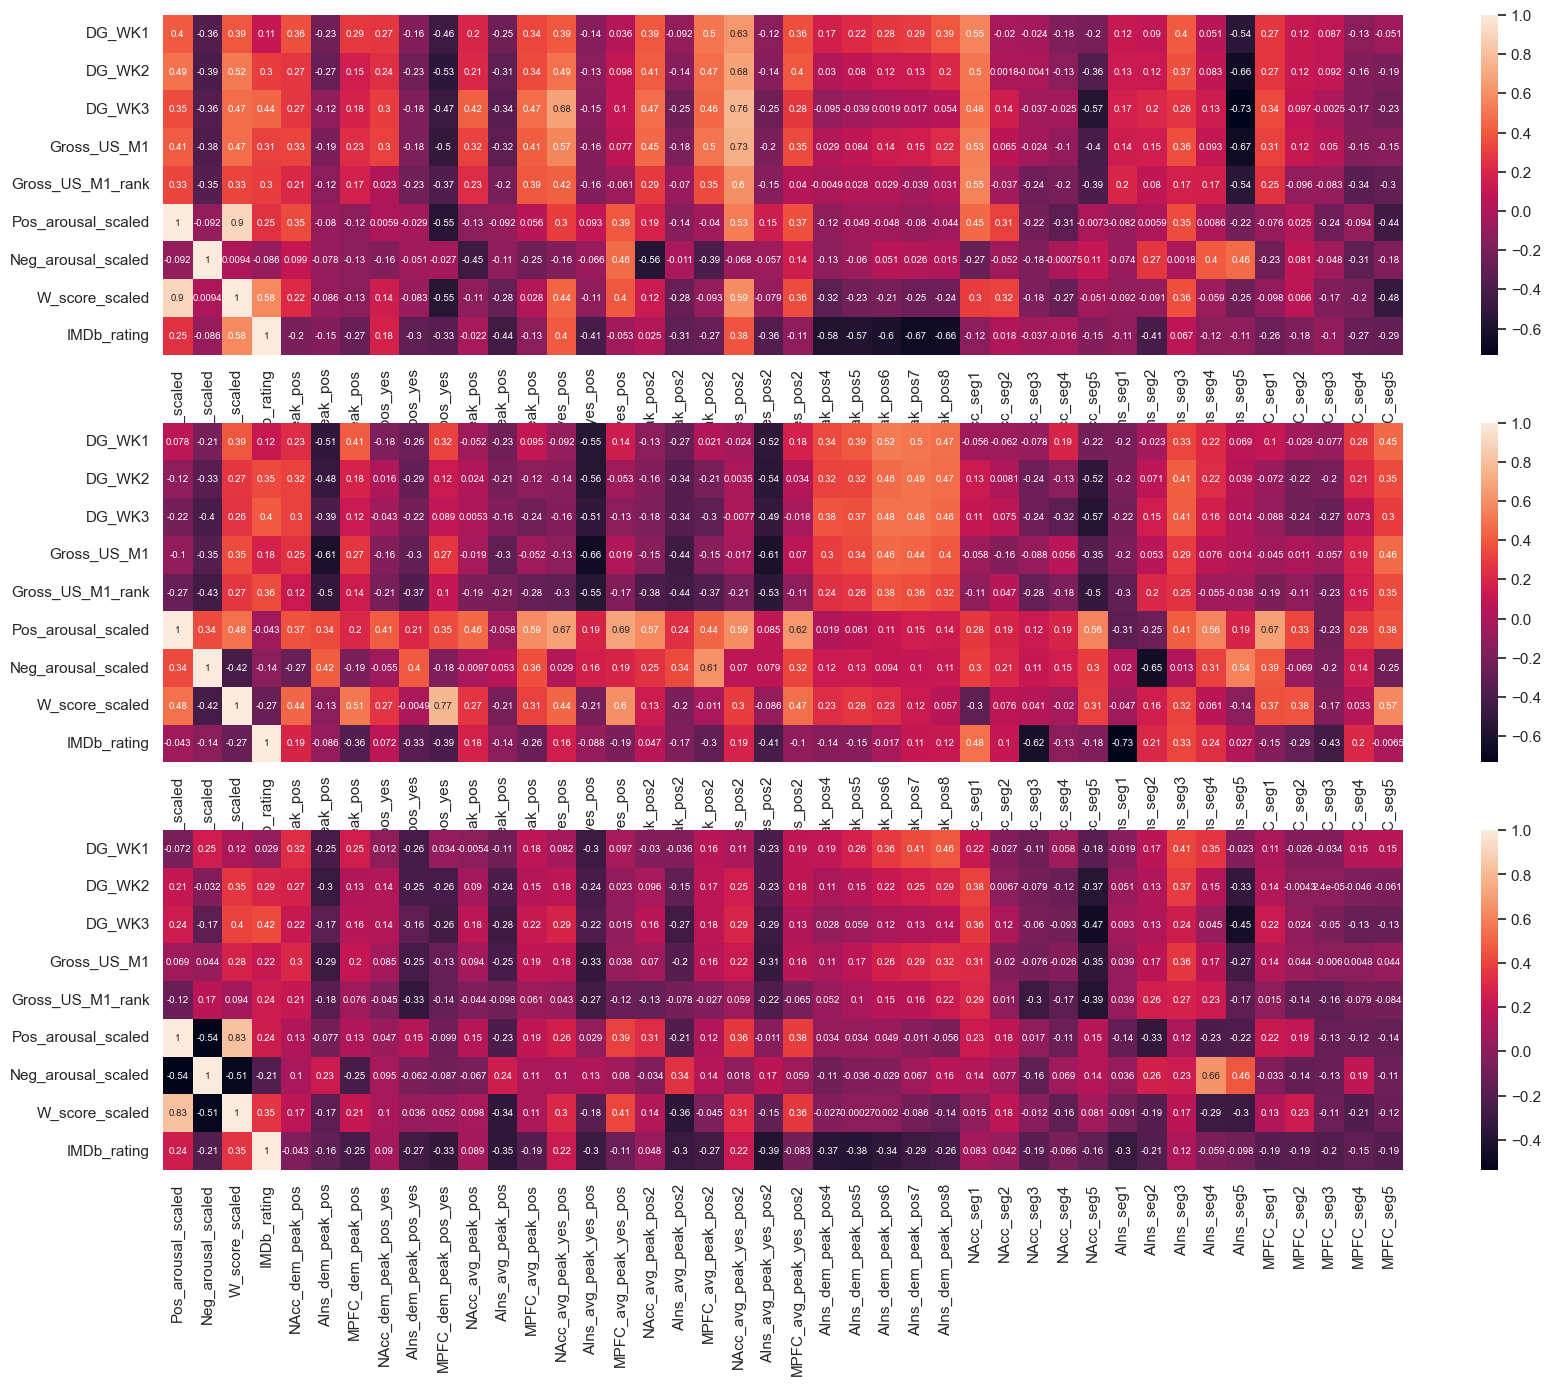

In [181]:


relevant_neuro_cols = ["DG_WK1", "DG_WK2", "DG_WK3","Gross_US_M1", "Gross_US_M1_rank", #"Gross_US_M1_log" ,
                       #"Gross_Total_US", #"GrossOverTheaters_M1", # These two were calculated with (cummulative gross)/(cummulative theaters)
                        #"GrossW1", "GrossW2", "GrossW3", "GrossM1", 
                        #"GrossTheatersM1", #"GT_AVG_W2", "GT_AVG_W3", "GT_AVG_M1",
                        #"GT_AVG_Total", "GT_AVG_Total_log", "GT_Total", 
                        "Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled", "IMDb_rating",
                        #"GrossTheatersW1", "GrossTheatersW2", "GrossTheatersW3", 
                         #'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
                         #'NAcc_offset', 'AIns_offset', 'MPFC_offset',
                         #'NAcc_whole', 'AIns_whole', 'MPFC_whole', 
                         #'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', "NAcc_TR3", #"NAcc_TR4", "NAcc_TR5", "NAcc_TR6",
                         #"NAcc_TR7", "NAcc_TR8", "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", 
                         #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
                         #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 
                         #'NAcc_trailer_peak_pos', 'AIns_trailer_peak_pos', 'MPFC_trailer_peak_pos', 
                         #"NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",
                         #"NAcc_trailer_peak_neg", "AIns_trailer_peak_neg", "MPFC_trailer_peak_neg", 
                         "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos", 
                         "NAcc_dem_peak_pos_yes", "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
                         "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
                         "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos', 
                         "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
                         "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2', 
                         'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
                         'AIns_dem_peak_pos8', 
                         #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
                         #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
                         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
                         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
                         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"
                         ]
                         

aggregate_comedy_filtered_df = aggregate_combined_comedy_df[relevant_neuro_cols]
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.dropna()
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.corr()

aggregate_horror_filtered_df = aggregate_combined_horror_df[relevant_neuro_cols]
aggregate_horror_filtered_df = aggregate_horror_filtered_df.dropna()
aggregate_horror_filtered_df = aggregate_horror_filtered_df.corr()

aggregate_combined_filtered_df = aggregate_combined_df[relevant_neuro_cols]
aggregate_combined_filtered_df = aggregate_combined_filtered_df.dropna()
aggregate_combined_filtered_df = aggregate_combined_filtered_df.corr()

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=False) 

sns.heatmap(aggregate_comedy_filtered_df.iloc[0:9, 5:], ax=axs[0], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_horror_filtered_df.iloc[0:9, 5:], ax=axs[1], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_combined_filtered_df.iloc[0:9, 5:], ax=axs[2], annot=True, annot_kws={'size': 7})

<Axes: >

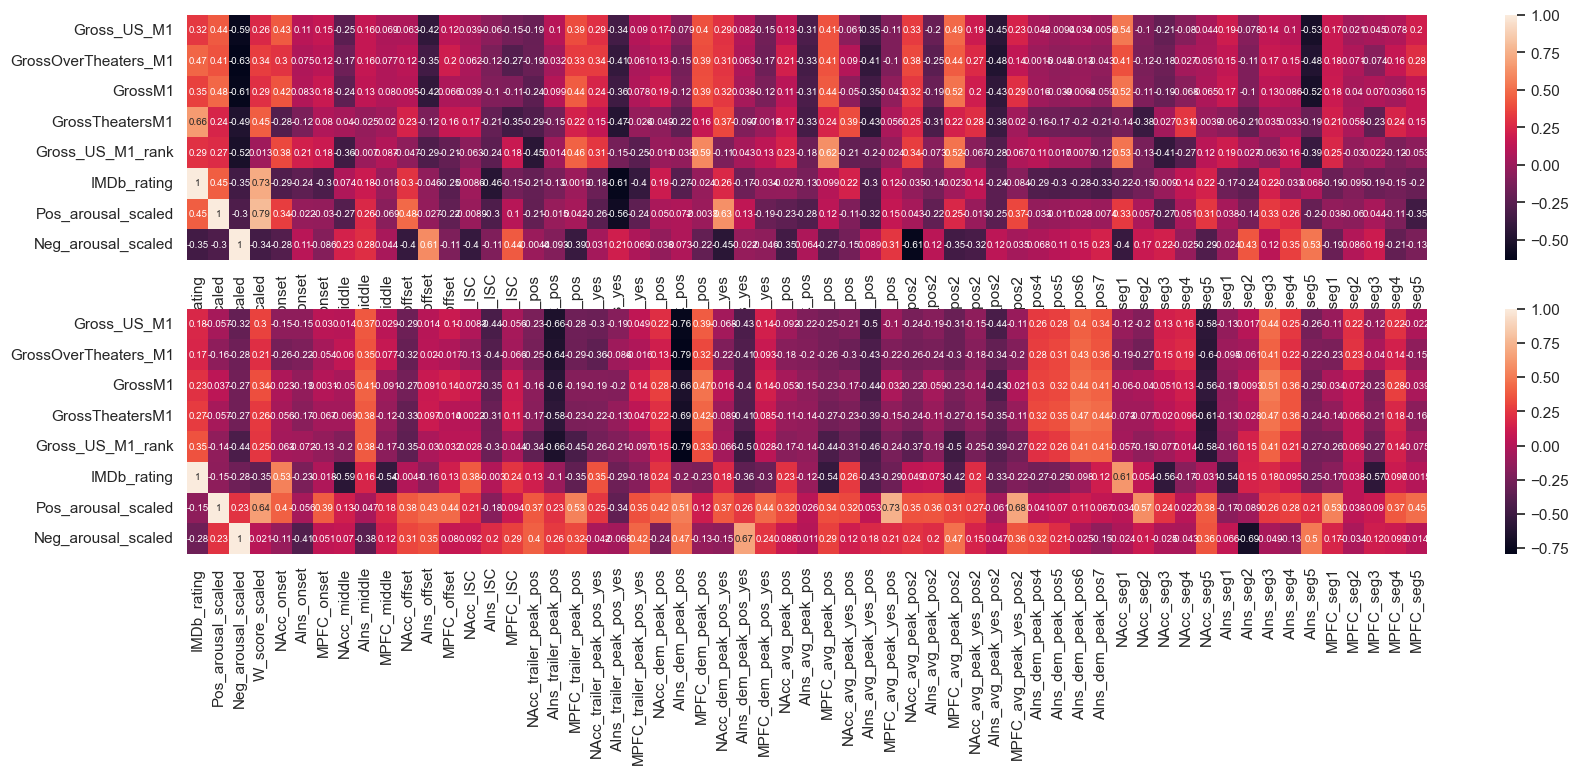

In [185]:
LC_aggregate_combined_df["GrossOverTheaters_M1"] = LC_aggregate_combined_df["Gross_US_M1"] / LC_aggregate_combined_df["Theaters_US_M1"]
LH_aggregate_combined_df["GrossOverTheaters_M1"] = LH_aggregate_combined_df["Gross_US_M1"] / LH_aggregate_combined_df["Theaters_US_M1"]

LC_aggregate_combined_df["GrossTheatersM1"] = (LC_aggregate_combined_df["DG_WK1"] / LC_aggregate_combined_df["NumT_WK1"]) + (LC_aggregate_combined_df["DG_WK2"] / LC_aggregate_combined_df["NumT_WK2"]) + (LC_aggregate_combined_df["DG_WK3"] / LC_aggregate_combined_df["NumT_WK3"]) + (LC_aggregate_combined_df["DG_WK4"] / LC_aggregate_combined_df["NumT_WK4"])
LH_aggregate_combined_df["GrossTheatersM1"] = (LH_aggregate_combined_df["DG_WK1"] / LH_aggregate_combined_df["NumT_WK1"]) + (LH_aggregate_combined_df["DG_WK2"] / LH_aggregate_combined_df["NumT_WK2"]) + (LH_aggregate_combined_df["DG_WK3"] / LH_aggregate_combined_df["NumT_WK3"]) + (LH_aggregate_combined_df["DG_WK4"] / LH_aggregate_combined_df["NumT_WK4"])

LC_aggregate_combined_df["GrossM1"] = (LC_aggregate_combined_df["DG_WK1"]) + (LC_aggregate_combined_df["DG_WK2"]) + (LC_aggregate_combined_df["DG_WK3"]) + (LC_aggregate_combined_df["DG_WK4"])
LH_aggregate_combined_df["GrossM1"] = (LH_aggregate_combined_df["DG_WK1"]) + (LH_aggregate_combined_df["DG_WK2"]) + (LH_aggregate_combined_df["DG_WK3"]) + (LH_aggregate_combined_df["DG_WK4"])


#LH_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LH.csv", index=True)

LC_aggregate_combined_df["Gross_US_M1_rank"] = LC_aggregate_combined_df["Gross_US_M1"].rank()
LH_aggregate_combined_df["Gross_US_M1_rank"] = LH_aggregate_combined_df["Gross_US_M1"].rank()



relevant_neuro_cols = ["Gross_US_M1", "GrossOverTheaters_M1", "GrossM1", "GrossTheatersM1", "Gross_US_M1_rank",
                        "IMDb_rating", "Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled",
                        'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
                         'NAcc_offset', 'AIns_offset', 'MPFC_offset',
                         #'NAcc_whole', 'AIns_whole', 'MPFC_whole', 
                         'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', 
                         #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
                         #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 
                         'NAcc_trailer_peak_pos', 'AIns_trailer_peak_pos', 'MPFC_trailer_peak_pos', 
                         "NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",
                         "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos", 
                         "NAcc_dem_peak_pos_yes", "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
                         "NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos",
                         "NAcc_avg_peak_yes_pos" , 'AIns_avg_peak_yes_pos', 'MPFC_avg_peak_yes_pos', 
                         "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
                         "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2', 
                         'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
                         #'AIns_dem_peak_pos8', 
                         #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
                         #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
                         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
                         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
                         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"]

LC_aggregate_filtered_df = LC_aggregate_combined_df[relevant_neuro_cols]
LC_aggregate_filtered_df = LC_aggregate_filtered_df.dropna()
LC_aggregate_filtered_df = LC_aggregate_filtered_df.corr()

LH_aggregate_filtered_df = LH_aggregate_combined_df[relevant_neuro_cols]
LH_aggregate_filtered_df = LH_aggregate_filtered_df.dropna()
LH_aggregate_filtered_df = LH_aggregate_filtered_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(20, 7), sharex=False)

sns.heatmap(LC_aggregate_filtered_df.iloc[0:8, 5:], ax=axs[0], annot=True, annot_kws={'size': 7})
sns.heatmap(LH_aggregate_filtered_df.iloc[0:8, 5:], ax=axs[1], annot=True, annot_kws={'size': 7})


In [ ]:
"""
# Filter data and append aggregate metrics.
Aggregate_comedy_df <- filter(Individual_comedy_df,
                       ("NAcc_onset_z" < filtering_threshold) | ("NAcc_onset_z" > -filtering_threshold)  |
                       ("AIns_onset_z" < filtering_threshold) | ("AIns_onset_z" > -filtering_threshold)  |
                       ("MPFC_onset_z" < filtering_threshold) | ("MPFC_onset_z" > -filtering_threshold)  |
                       ("NAcc_middle_z" < filtering_threshold) | ("NAcc_middle_z" > -filtering_threshold) |
                       ("AIns_middle_z" < filtering_threshold) | ("AIns_middle_z" > -filtering_threshold) |
                       ("MPFC_middle_z" < filtering_threshold) | ("MPFC_middle_z" > -filtering_threshold) |
                       ("NAcc_offset_z" < filtering_threshold) | ("NAcc_offset_z" > -filtering_threshold) |
                       ("AIns_offset_z" < filtering_threshold) | ("AIns_offset_z" > -filtering_threshold) |
                       ("MPFC_offset_z" < filtering_threshold) | ("MPFC_offset_z" > -filtering_threshold) |
                       ("NAcc_ind_peaks_pos_z" < filtering_threshold) | ("NAcc_ind_peaks_pos_z" > -filtering_threshold) |
                       ("AIns_ind_peaks_pos_z" < filtering_threshold) | ("AIns_ind_peaks_pos_z" > -filtering_threshold) |
                       ("MPFC_ind_peaks_pos_z" < filtering_threshold) | ("MPFC_ind_peaks_pos_z" > -filtering_threshold) |
                       ("NAcc_dem_peak_pos_z" < filtering_threshold) | ("NAcc_dem_peak_pos_z" > -filtering_threshold) |
                       ("AIns_dem_peak_pos_z" < filtering_threshold) | ("AIns_dem_peak_pos_z" > -filtering_threshold) |
                       ("MPFC_dem_peak_pos_z" < filtering_threshold) | ("MPFC_dem_peak_pos_z" > -filtering_threshold) |
                       ("NAcc_dem_peak_pos_yes_z" < filtering_threshold) | ("NAcc_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("AIns_dem_peak_pos_yes_z" < filtering_threshold) | ("AIns_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("MPFC_dem_peak_pos_yes_z" < filtering_threshold) | ("MPFC_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("NAcc_avg_peak_pos_z" < filtering_threshold) | ("NAcc_avg_peak_pos_z" > -filtering_threshold) |
                       ("AIns_avg_peak_pos_z" < filtering_threshold) | ("AIns_avg_peak_pos_z" > -filtering_threshold) |
                       ("MPFC_avg_peak_pos_z" < filtering_threshold) | ("MPFC_avg_peak_pos_z" > -filtering_threshold) |
                       ("NAcc_avg_peak_yes_pos" < filtering_threshold) | ("NAcc_avg_peak_yes_pos" > -filtering_threshold) |
                       ("AIns_avg_peak_yes_pos" < filtering_threshold) | ("AIns_avg_peak_yes_pos" > -filtering_threshold) |
                       ("MPFC_avg_peak_yes_pos" < filtering_threshold) | ("MPFC_avg_peak_yes_pos" > -filtering_threshold)) %>% 
                       group_by(Trailer) %>%
                       summarise_if(is.numeric, mean, na.rm = TRUE) #%>%
        
Aggregate_comedy_df <- merge(x = Aggregate_comedy_df, y = Aggregate_metrics_comedy_df, by = "Trailer")


relevant_cols = ["Trailer", 'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
         'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
         'NAcc_offset', 'AIns_offset', 'MPFC_offset', "NAcc_ISC", "AIns_ISC", "MPFC_ISC",
         "NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC", "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC",
         "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
         #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg", 
         "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
         "NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no", 
         'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
         'AIns_dem_peak_pos8']

NAcc_TRs_keys = ['NAcc_TR1', 'NAcc_TR2', 'NAcc_TR3', 'NAcc_TR4', 'NAcc_TR5', 
                'NAcc_TR6', 'NAcc_TR7', 'NAcc_TR8', 'NAcc_TR9', 'NAcc_TR10',
                'NAcc_TR11', 'NAcc_TR12', 'NAcc_TR13', 'NAcc_TR14', 'NAcc_TR15']

AIns_TRs_keys = ['AIns_TR1', 'AIns_TR2', 'AIns_TR3', 'AIns_TR4', 'AIns_TR5',
                'AIns_TR6', 'AIns_TR7', 'AIns_TR8', 'AIns_TR9', 'AIns_TR10',
                'AIns_TR11', 'AIns_TR12', 'AIns_TR13', 'AIns_TR14', 'AIns_TR15']

MPFC_TRs_keys = ['MPFC_TR1', 'MPFC_TR2', 'MPFC_TR3', 'MPFC_TR4', 'MPFC_TR5',
                'MPFC_TR6', 'MPFC_TR7', 'MPFC_TR8', 'MPFC_TR9', 'MPFC_TR10',
                'MPFC_TR11', 'MPFC_TR12', 'MPFC_TR13', 'MPFC_TR14', 'MPFC_TR15']

# LC_df = LC_df[relevant_cols + NAcc_TRs_keys + AIns_TRs_keys + MPFC_TRs_keys]
# Like_comedy_aggregate_df = LC_df.groupby("Trailer", as_index=False, dropna=False).mean()
# Like_comedy_aggregate_df.reset_index(inplace=True)
# Like_comedy_aggregate_df["Type"] = "comedy"
"""

'\n# Filter data and append aggregate metrics.\nAggregate_comedy_df <- filter(Individual_comedy_df,\n                       ("NAcc_onset_z" < filtering_threshold) | ("NAcc_onset_z" > -filtering_threshold)  |\n                       ("AIns_onset_z" < filtering_threshold) | ("AIns_onset_z" > -filtering_threshold)  |\n                       ("MPFC_onset_z" < filtering_threshold) | ("MPFC_onset_z" > -filtering_threshold)  |\n                       ("NAcc_middle_z" < filtering_threshold) | ("NAcc_middle_z" > -filtering_threshold) |\n                       ("AIns_middle_z" < filtering_threshold) | ("AIns_middle_z" > -filtering_threshold) |\n                       ("MPFC_middle_z" < filtering_threshold) | ("MPFC_middle_z" > -filtering_threshold) |\n                       ("NAcc_offset_z" < filtering_threshold) | ("NAcc_offset_z" > -filtering_threshold) |\n                       ("AIns_offset_z" < filtering_threshold) | ("AIns_offset_z" > -filtering_threshold) |\n                       ("MPFC_